# Final Project

1.Research Question
- How has the performance of NFL teams evolved over the past decade in terms of win percentages and offensive metrics?
- How have wins evolved over time for each conference in the NFL?
- What is the relationship between total yards, points, and wins? Which factor—yards or points—has a greater impact on winning?
- How do average points compare between the best and worst teams in the league?
- Which factor, turnover percentage or penalties, has a more significant impact on wins and point differential? What is the effect of turnover percentage on win percentage and point differential?
- Can a regression model be used to accurately predict wins in the NFL?
- What correlations exist between various NFL statistics?
= How are passing yards and rushing yards related across teams?
- How do total snaps influence offensive outcomes?
Investigate the relationship between total snaps and key metrics like yards gained, touchdowns, and total points.

- What is the impact of passing efficiency on team success?
Explore the relationship between pass completion percentage and win percentage, total points, and yards gained.

- How does the frequency of rushing versus passing impact overall team performance?
Compare teams that rely more heavily on rushing or passing in terms of win percentage, yards per snap (yps), and points per game.

- Do teams that excel in no-huddle and shotgun formations score more points?
Examine if teams with higher no-huddle and shotgun usage have better offensive performance (yards gained, touchdowns, points).

- What is the correlation between air yards and total passing yards?
Determine how air yards contribute to overall passing success and offensive productivity.

- Does a higher number of turnovers (fumbles and interceptions) lead to a significant drop in win percentage?
Analyze the impact of turnovers on win percentage and other success metrics like point differential.

- How does a team's home and away performance differ in terms of wins and points scored?
Compare the performance of teams at home vs. away, looking at wins, losses, and points per game.

- Which factors contribute most to a high points per game average?
Identify the strongest predictors of points per game by exploring variables such as pass attempts, rushing yards, and touchdowns.

- Is there a relationship between receiving yards and points scored?
Explore if teams with higher receiving yards tend to score more points or win more games.

- How does win percentage change over time across teams with different offensive strategies?
Track how offensive strategies (e.g., passing-heavy, rushing-heavy) correlate with win percentage trends over multiple seasons.

2.Justification - why is this relevant?
This project is especially relevant with the start of the new 2024 NFL season, as it will allow us to examine changes in team offenses over the past 10 years and provide insights into how teams’ offenses have improved. These findings can also help fans anticipate trends and performances in the upcoming season.

3.Data Sources
NFL dataset 
- https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022
- https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023/code

4.Libraries Used
- pandas for data manipulation and analysis
- matplotlib and seaborn for visualization
- scikit-learn for any machine learning models or predictions



# Introduction to Dataset and Summary Statistics

## Dataset Overview

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from IPython.display import display

# Load the dataset 
df = pd.read_csv('..\Final Project\dataset\yearly_team_data.csv')


# Display the first few rows of the dataframe to get an overview
pd.set_option('display.max_columns', None) # Show all columns
# Clean the 'record' column by stripping leading/trailing whitespace and tabs
df['record'] = df['record'].str.strip()
df.head()

,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,fg_points,fumble,fumble_lost,shotgun,no_huddle,qb_dropback,pass_snaps_count,pass_snaps_pct,pass_attempts,complete_pass,incomplete_pass,air_yards,passing_yards,pass_td,interception,targets,receptions,receiving_yards,yards_after_catch,receiving_td,pass_fumble,pass_fumble_lost,rush_snaps_count,rush_snaps_pct,qb_scramble,rushing_yards,run_td,run_fumble,run_fumble_lost,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct,record,yps
0,ARI,2012,1013,7595,28,25,25,268,168,25,75,16,10,568,53,676,665,0.66,586,337,249,4862,3383,17,21,586,337,3383,1363,17,10,7,348,0.34,11,1207,11,6,3,4,4,0,1,7,0,5,11,0,0.313,5-11-0,7.50
1,ARI,2013,1020,9855,37,37,30,349,222,37,90,17,9,385,17,622,617,0.60,551,363,188,5284,4291,25,22,551,363,4291,1756,25,9,5,403,0.40,5,1560,12,8,4,6,2,0,4,4,0,10,6,0,0.625,10-6-0,9.66
2,ARI,2014,983,9128,28,27,29,282,168,27,87,13,5,495,17,613,598,0.61,556,320,236,6028,3990,22,12,556,320,3990,1604,22,9,3,385,0.39,15,1326,6,4,2,7,1,0,4,4,0,11,5,0,0.688,11-5-0,9.29
3,ARI,2015,1005,11337,53,53,28,455,318,53,84,16,9,400,11,590,583,0.58,543,353,190,6084,4775,36,13,543,353,4775,1782,36,8,5,422,0.42,7,1946,16,8,4,6,2,0,7,1,0,13,3,0,0.813,13-3-0,11.28
4,ARI,2016,1080,10302,51,43,21,412,306,43,63,25,11,529,51,692,688,0.64,626,383,243,6204,4425,30,17,626,383,4425,1747,30,14,6,392,0.36,4,1739,21,11,5,4,4,1,3,5,0,7,9,1,0.412,7-9-1,9.54


In [3]:
# Print random rows
df.sample(10).T

,174,152,4,45,29,111,183,33,155,96
team,JAX,HOU,ARI,BUF,BAL,DEN,KC,BAL,HOU,DAL
season,2018,2020,2016,2021,2017,2015,2015,2021,2023,2012
total_snaps,1001,932,1080,1125,1038,1047,945,1177,1078,1036
yards_gained,8261,10837,10302,10973,8140,9913,8810,10719,10404,11014
touchdown,23,44,51,57,38,35,41,43,40,42
extra_point_attempt,22,37,43,51,39,35,39,32,31,37
field_goal_attempt,23,27,21,28,34,30,30,35,34,29
total_points,229,382,412,477,369,335,375,395,373,376
td_points,138,264,306,342,228,210,246,258,240,252
xp_points,22,37,43,51,39,35,39,32,31,37


### Column Descriptions

| Column Name                | Data Type | Description                                           | Example Values |
|----------------------------|-----------|-------------------------------------------------------|----------------|
| team                       | Object    | The name of the NFL team.                             | "NYG" New York Giants |
| season                     | Int       | The year of the season.                              | 2022           |
| total_snaps                | Int       | Total number of plays (snaps) run by the team.      | 1200           |
| yards_gained               | Int       | Total yards gained by the team during the season.    | 3500           |
| touchdown                  | Int       | Total touchdowns scored by the team.                  | 25             |
| extra_point_attempt        | Int       | Number of extra point attempts.                        | 20             |
| field_goal_attempt         | Int       | Number of field goal attempts made.                   | 15             |
| total_points               | Int       | Total points scored by the team.                      | 275            |
| td_points                  | Int       | Points scored from touchdowns.                         | 150            |
| xp_points                  | Int       | Points scored from extra point attempts.              | 20             |
| fg_points                  | Int       | Points scored from field goals.                       | 45             |
| fumble                     | Int       | Total fumbles committed by the team.                  | 10             |
| fumble_lost                | Int       | Total fumbles lost by the team.                       | 5              |
| shotgun                    | Int       | Number of plays run from a shotgun formation.         | 150            |
| no_huddle                  | Int       | Number of no-huddle plays run by the team.           | 75             |
| qb_dropback                | Int       | Total dropbacks by the quarterback.                   | 400            |
| pass_snaps_count           | Int       | Total number of pass snaps taken.                     | 300            |
| pass_snaps_pct             | Float     | Percentage of snaps that were passing plays.          | 25.0           |
| pass_attempts              | Int       | Total number of passing attempts.                      | 500            |
| complete_pass              | Int       | Total number of completed passes.                      | 350            |
| incomplete_pass            | Int       | Total number of incomplete passes.                    | 150            |
| air_yards                  | Int       | Total air yards gained on passes.                     | 2500           |
| passing_yards              | Int       | Total passing yards gained.                           | 3000           |
| pass_td                    | Int       | Total touchdown passes thrown.                         | 20             |
| interception               | Int       | Total interceptions thrown by the team.               | 10             |
| targets                    | Int       | Total targets for receivers.                           | 400            |
| receptions                 | Int       | Total receptions made by receivers.                    | 350            |
| receiving_yards            | Int       | Total yards gained by receivers.                       | 2800           |
| yards_after_catch          | Int       | Total yards gained after catch by receivers.          | 800            |
| receiving_td               | Int       | Total receiving touchdowns scored.                     | 10             |
| pass_fumble                | Int       | Total fumbles by the quarterback on pass plays.      | 5              |
| pass_fumble_lost           | Int       | Total fumbles lost by the quarterback.                | 2              |
| rush_snaps_count           | Int       | Total number of rush snaps taken.                     | 200            |
| rush_snaps_pct             | Float     | Percentage of snaps that were rushing plays.          | 15.0           |
| qb_scramble                | Int       | Total times the quarterback scrambled.                | 25             |
| rushing_yards              | Int       | Total rushing yards gained.                           | 1500           |
| run_td                     | Int       | Total rushing touchdowns scored.                       | 12             |
| run_fumble                 | Int       | Total rushing fumbles committed.                       | 6              |
| run_fumble_lost            | Int       | Total rushing fumbles lost.                           | 3              |
| home_wins                  | Int       | Total wins at home.                                   | 6              |
| home_losses                | Int       | Total losses at home.                                 | 2              |
| home_ties                  | Int       | Total ties at home.                                   | 0              |
| away_wins                  | Int       | Total wins away.                                      | 5              |
| away_losses                | Int       | Total losses away.                                    | 3              |
| away_ties                  | Int       | Total ties away.                                      | 0              |
| wins                       | Int       | Total wins in the season.                             | 11             |
| losses                     | Int       | Total losses in the season.                           | 5              |
| ties                       | Int       | Total ties in the season.                             | 0              |
| win_pct                    | Float     | Win percentage of the team.                           | 0.688          |
| record                     | Object    | Win-loss-tie record of the team.                      | "5-11-0"       |
| yps                        | Float     | Yards per snap.                                       | 4.8            |


## Summary Statistics

In [4]:
summary_statistics = df.describe(include='all')  # Include all columns, numerical and categorical
summary_statistics = summary_statistics.applymap(lambda x: f'{x:g}' if isinstance(x, (int, float)) else x)

# Display the summary statistics
print("Summary Statistics:")
display(summary_statistics)

Summary Statistics:


,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,fg_points,fumble,fumble_lost,shotgun,no_huddle,qb_dropback,pass_snaps_count,pass_snaps_pct,pass_attempts,complete_pass,incomplete_pass,air_yards,passing_yards,pass_td,interception,targets,receptions,receiving_yards,yards_after_catch,receiving_td,pass_fumble,pass_fumble_lost,rush_snaps_count,rush_snaps_pct,qb_scramble,rushing_yards,run_td,run_fumble,run_fumble_lost,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct,record,yps
count,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
unique,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42,nan
top,ARI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7-9-0,nan
freq,12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37,nan
mean,nan,2017.5,1024.26,9670.45,41.651,36.474,26.5911,366.154,249.906,36.474,79.7734,16.9375,8.02865,642.086,102.25,627.474,602.628,0.588307,548.174,357.094,191.081,4593.27,4032.02,26.9531,13.5755,548.174,357.094,4030.8,1851.66,26.9531,10.0286,5.01562,421.633,0.411693,24.875,1859.2,13.9505,6.90885,3.01302,4.5,3.6224,0.03125,3.59115,4.53125,0.03125,8.09115,8.15365,0.0625,0.496836,nan,9.43904
std,nan,3.45656,52.2525,1050.13,9.11448,9.61419,5.58177,64.7982,54.6869,9.61419,16.7453,4.63512,2.89624,146.949,102.215,58.0605,59.8663,0.0466698,59.2602,46.2316,26.6093,647.379,535.805,7.40319,4.49421,59.2602,46.2316,535.79,311.686,7.40319,3.38044,2.24708,49.8091,0.0466698,14.6382,348.128,5.11182,3.03496,1.78105,1.79497,1.79224,0.17422,1.7912,1.78741,0.17422,3.06578,3.07348,0.242377,0.18944,nan,0.884055
min,nan,2012,866,6761,21,16,8,227,126,16,24,6,1,228,6,486,436,0.45,361,223,131,2898,2598,12,2,361,223,2589,1124,12,2,0,314,0.31,1,1168,3,0,0,0,0,0,0,0,0,0,1,0,0,nan,7.1
25%,nan,2014.75,989,8916.5,35,30,23,319.75,210,30,69,14,6,541.5,45,587.75,560,0.56,504.75,324.75,174,4116.25,3644.75,22,10,504.75,324.75,3643.5,1644.75,22,8,3,386,0.38,14,1616.5,10,5,2,3,2,0,2,3,0,6,6,0,0.375,nan,8.7875
50%,nan,2017.5,1018,9669.5,40,35,27,361,240,35,81,17,8,638,74.5,630,607,0.59,551.5,357,191,4571,4020,26,13,551.5,357,4018,1841,26,10,5,415,0.41,22,1820,13,7,3,5,4,0,4,5,0,8,8,0,0.5,nan,9.385
75%,nan,2020.25,1060.25,10348.2,48,43,30,411,288,43,90,20,10,732.25,123,665,648,0.62,589,384.25,209,5021.25,4388.75,32,16,589,384.25,4388.75,2054.5,32,12,6,456.25,0.44,34,2062.5,17,9,4,6,5,0,5,6,0,10.25,10,0,0.6305,nan,10.02


## Check for missing data

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
team                   0
season                 0
total_snaps            0
yards_gained           0
touchdown              0
extra_point_attempt    0
field_goal_attempt     0
total_points           0
td_points              0
xp_points              0
fg_points              0
fumble                 0
fumble_lost            0
shotgun                0
no_huddle              0
qb_dropback            0
pass_snaps_count       0
pass_snaps_pct         0
pass_attempts          0
complete_pass          0
incomplete_pass        0
air_yards              0
passing_yards          0
pass_td                0
interception           0
targets                0
receptions             0
receiving_yards        0
yards_after_catch      0
receiving_td           0
pass_fumble            0
pass_fumble_lost       0
rush_snaps_count       0
rush_snaps_pct         0
qb_scramble            0
rushing_yards          0
run_td                 0
run_fumble             0
run_fumble_lost        0
home_win

## Additional information on dataset

In [6]:
# Additional dataset information (data types, non-null count, etc.)
print("\nDataset Info:") 
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 384 non-null    object 
 1   season               384 non-null    int64  
 2   total_snaps          384 non-null    int64  
 3   yards_gained         384 non-null    int64  
 4   touchdown            384 non-null    int64  
 5   extra_point_attempt  384 non-null    int64  
 6   field_goal_attempt   384 non-null    int64  
 7   total_points         384 non-null    int64  
 8   td_points            384 non-null    int64  
 9   xp_points            384 non-null    int64  
 10  fg_points            384 non-null    int64  
 11  fumble               384 non-null    int64  
 12  fumble_lost          384 non-null    int64  
 13  shotgun              384 non-null    int64  
 14  no_huddle            384 non-null    int64  
 15  qb_dropback          384 

## Additional Summary Statistics:

- Total Games Played: You can derive this from wins, losses, and ties.
- Average Points Per Game: Calculate as total_points / games_played.
- Average Yards Per Snap: Calculate as yards_gained / total_snaps.
- Turnover Ratio: Calculate as (fumble + interception) / total_snaps to understand how turnovers affect the game.
- Passing Efficiency: This could be measured as (passing_yards / pass_attempts) to see the effectiveness of the passing game.
- Rushing Efficiency: Similarly, rushing_yards / rush_snaps_count could be a valuable metric.

In [7]:
df['games_played'] = df['wins'] + df['losses'] + df['ties']
df['avg_points_per_game'] = df['total_points'] / df['games_played']
df['avg_yards_per_snap'] = df['yards_gained'] / df['total_snaps']
df['turnover_ratio'] = (df['fumble'] + df['interception']) / df['total_snaps']
df['passing_efficiency'] = df['passing_yards'] / df['pass_attempts']
df['rushing_efficiency'] = df['rushing_yards'] / df['rush_snaps_count']

summary_statistics = df.describe(include='all')  # Include all columns, numerical and categorical
summary_statistics = summary_statistics.applymap(lambda x: f'{x:g}' if isinstance(x, (int, float)) else x)

# Display the summary statistics
print("Summary Statistics:")
display(summary_statistics)

Summary Statistics:


,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,fg_points,fumble,fumble_lost,shotgun,no_huddle,qb_dropback,pass_snaps_count,pass_snaps_pct,pass_attempts,complete_pass,incomplete_pass,air_yards,passing_yards,pass_td,interception,targets,receptions,receiving_yards,yards_after_catch,receiving_td,pass_fumble,pass_fumble_lost,rush_snaps_count,rush_snaps_pct,qb_scramble,rushing_yards,run_td,run_fumble,run_fumble_lost,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct,record,yps,games_played,avg_points_per_game,avg_yards_per_snap,turnover_ratio,passing_efficiency,rushing_efficiency
count,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
unique,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42,nan,nan,nan,nan,nan,nan,nan
top,ARI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7-9-0,nan,nan,nan,nan,nan,nan,nan
freq,12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37,nan,nan,nan,nan,nan,nan,nan
mean,nan,2017.5,1024.26,9670.45,41.651,36.474,26.5911,366.154,249.906,36.474,79.7734,16.9375,8.02865,642.086,102.25,627.474,602.628,0.588307,548.174,357.094,191.081,4593.27,4032.02,26.9531,13.5755,548.174,357.094,4030.8,1851.66,26.9531,10.0286,5.01562,421.633,0.411693,24.875,1859.2,13.9505,6.90885,3.01302,4.5,3.6224,0.03125,3.59115,4.53125,0.03125,8.09115,8.15365,0.0625,0.496836,nan,9.43904,16.3073,22.4713,9.43906,0.0298257,7.36373,4.38881
std,nan,3.45656,52.2525,1050.13,9.11448,9.61419,5.58177,64.7982,54.6869,9.61419,16.7453,4.63512,2.89624,146.949,102.215,58.0605,59.8663,0.0466698,59.2602,46.2316,26.6093,647.379,535.805,7.40319,4.49421,59.2602,46.2316,535.79,311.686,7.40319,3.38044,2.24708,49.8091,0.0466698,14.6382,348.128,5.11182,3.03496,1.78105,1.79497,1.79224,0.17422,1.7912,1.78741,0.17422,3.06578,3.07348,0.242377,0.18944,nan,0.884055,0.494723,4.02433,0.884089,0.00680455,0.664556,0.450092
min,nan,2012,866,6761,21,16,8,227,126,16,24,6,1,228,6,486,436,0.45,361,223,131,2898,2598,12,2,361,223,2589,1124,12,2,0,314,0.31,1,1168,3,0,0,0,0,0,0,0,0,0,1,0,0,nan,7.1,16,14.1875,7.09781,0.0121335,5.64348,3.20913
25%,nan,2014.75,989,8916.5,35,30,23,319.75,210,30,69,14,6,541.5,45,587.75,560,0.56,504.75,324.75,174,4116.25,3644.75,22,10,504.75,324.75,3643.5,1644.75,22,8,3,386,0.38,14,1616.5,10,5,2,3,2,0,2,3,0,6,6,0,0.375,nan,8.7875,16,19.5,8.78452,0.0252176,6.88198,4.08093
50%,nan,2017.5,1018,9669.5,40,35,27,361,240,35,81,17,8,638,74.5,630,607,0.59,551.5,357,191,4571,4020,26,13,551.5,357,4018,1841,26,10,5,415,0.41,22,1820,13,7,3,5,4,0,4,5,0,8,8,0,0.5,nan,9.385,16,22.0901,9.38335,0.0295207,7.29151,4.38043
75%,nan,2020.25,1060.25,10348.2,48,43,30,411,288,43,90,20,10,732.25,123,665,648,0.62,589,384.25,209,5021.25,4388.75,32,16,589,384.25,4388.75,2054.5,32,12,6,456.25,0.44,34,2062.5,17,9,4,6,5,0,5,6,0,10.25,10,0,0.6305,nan,10.02,17,25.261,10.0202,0.0339308,7.81161,4.67621


In [8]:
# Display the summary statistics
print("Summary Statistics:")
df.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
season,384.0,2017.500000,3.456556,2012.000000,2014.750000,2017.500000,2020.250000,2023.000000
total_snaps,384.0,1024.260417,52.252549,866.000000,989.000000,1018.000000,1060.250000,1181.000000
yards_gained,384.0,9670.447917,1050.132630,6761.000000,8916.500000,9669.500000,10348.250000,12913.000000
touchdown,384.0,41.651042,9.114479,21.000000,35.000000,40.000000,48.000000,74.000000
extra_point_attempt,384.0,36.473958,9.614195,16.000000,30.000000,35.000000,43.000000,75.000000
field_goal_attempt,384.0,26.591146,5.581770,8.000000,23.000000,27.000000,30.000000,41.000000
total_points,384.0,366.153646,64.798179,227.000000,319.750000,361.000000,411.000000,594.000000
td_points,384.0,249.906250,54.686876,126.000000,210.000000,240.000000,288.000000,444.000000
xp_points,384.0,36.473958,9.614195,16.000000,30.000000,35.000000,43.000000,75.000000
fg_points,384.0,79.773438,16.745311,24.000000,69.000000,81.000000,90.000000,123.000000


# Correlations

## Heat Map

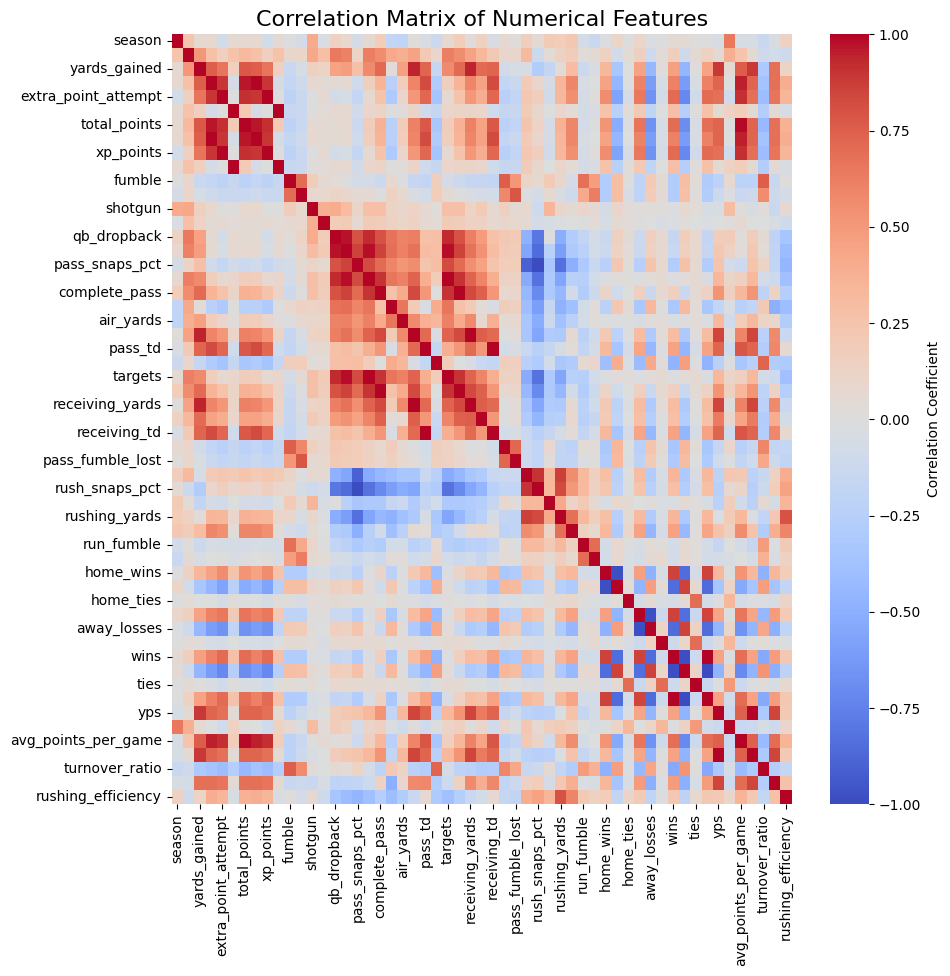

In [9]:
# Create the heatmap

# Select numerical columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical].corr(), cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Numerical Features', fontsize=16)

# Save the plot
plt.savefig('..\Final Project\image\correlation_heatmap.png')

# Display the plot
plt.show()



From the correlation matrix, we can infer several important relationships between the numerical features:

1. **Strong Positive Correlations**:
   - **Passing Yards and Pass Attempts**: These variables are highly correlated, which makes sense since more pass attempts typically result in more passing yards.
   - **Total Points and Touchdowns (TD Points)**: There is a strong correlation here, indicating that touchdowns contribute significantly to the total points scored by a team.
   - **Wins and Win Percentage**: Naturally, these are closely tied, as more wins will result in a higher win percentage.

2. **Negative Correlations**:
   - **Fumbles and Wins**: There appears to be a negative correlation between fumbles (and fumbles lost) and wins, suggesting that teams that commit more fumbles are less likely to win games.
   - **Interceptions and Wins**: Similarly, a higher number of interceptions negatively correlates with wins.

3. **Interesting Relationships**:
   - **Pass Snaps Percent and Passing Yards**: Pass snaps percentage seems to have a moderate positive correlation with passing yards, which shows that teams that pass more frequently tend to gain more yards through the air.
   - **Rush Snaps Percent and Passing Yards**: Conversely, there's a slight negative correlation between rush snaps percent and passing yards, indicating that teams that run the ball more often tend to pass less and gain fewer passing yards.

This analysis helps identify which aspects of a team's offense are most closely associated with success (such as fewer turnovers and more passing yards). Further analysis could involve breaking down these relationships by season or team to explore trends over time.

## Numerical features associated with a team's number of wins, sorted by descending

calculates the correlation between each numerical column in the dataset and the 'wins' column. The correlation indicates how strongly a particular feature is linearly related to the number of wins, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation). A correlation close to 0 would suggest little to no linear relationship.

In [10]:
df[numerical].corrwith(df['wins']).abs().sort_values(ascending=False)

wins                   1.000000
win_pct                0.996785
losses                 0.990168
home_wins              0.855220
away_wins              0.854557
away_losses            0.853642
home_losses            0.846679
extra_point_attempt    0.707368
xp_points              0.707368
total_points           0.697132
avg_points_per_game    0.691040
td_points              0.615691
touchdown              0.615691
turnover_ratio         0.538209
passing_efficiency     0.486535
interception           0.473396
yards_gained           0.464900
run_td                 0.458449
avg_yards_per_snap     0.450653
yps                    0.450540
pass_td                0.449643
receiving_td           0.449643
rushing_yards          0.348181
rush_snaps_count       0.348170
pass_fumble            0.330539
incomplete_pass        0.327893
receiving_yards        0.307939
passing_yards          0.306810
pass_fumble_lost       0.300378
rush_snaps_pct         0.288886
pass_snaps_pct         0.288886
fumble  

In [11]:
# List of columns to drop based on win correlation analysis
columns_to_drop = ['win_pct', 'losses', 'ties', 'home_wins', 'home_losses', 'home_ties', 
                   'away_wins', 'away_losses', 'away_ties', 'season']

# Drop the unnecessary columns for win correlation analysis
df_reduced = df.drop(columns=columns_to_drop)

# Select only the numerical columns that remain in df_reduced
numerical_reduced = df_reduced.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation of the remaining numerical columns with 'wins'
df_reduced[numerical_reduced].corrwith(df_reduced['wins']).sort_values(ascending=False)


wins                   1.000000
extra_point_attempt    0.707368
xp_points              0.707368
total_points           0.697132
avg_points_per_game    0.691040
td_points              0.615691
touchdown              0.615691
passing_efficiency     0.486535
yards_gained           0.464900
run_td                 0.458449
avg_yards_per_snap     0.450653
yps                    0.450540
receiving_td           0.449643
pass_td                0.449643
rushing_yards          0.348181
rush_snaps_count       0.348170
receiving_yards        0.307939
passing_yards          0.306810
rush_snaps_pct         0.288886
yards_after_catch      0.283803
field_goal_attempt     0.280789
fg_points              0.280789
rushing_efficiency     0.228822
total_snaps            0.165675
receptions             0.160574
complete_pass          0.160574
games_played          -0.011629
pass_attempts         -0.021961
targets               -0.021961
shotgun               -0.023321
no_huddle             -0.024402
air_yard

From the correlation data, the following key points can be inferred about the relationship between various numerical features and the number of wins:

### Strong Positive Correlations:
1. **Extra Point Attempts and XP Points**: Both extra point attempts and extra point (XP) points have a high positive correlation (~0.71) with wins. This suggests that teams that score more touchdowns (leading to more extra point attempts) tend to win more games.
2. **Total Points and Touchdown Points**: Total points (0.697) and touchdown points (0.615) also show strong positive correlations with wins, indicating that scoring more points is highly related to winning games.
3. **Touchdowns (0.615)**: Unsurprisingly, touchdowns themselves are strongly correlated with wins. Teams that score more touchdowns tend to have more victories.
4. **Yards Gained (0.465)**: Total yards gained is positively correlated with wins, showing that teams that accumulate more offensive yards tend to win more games.
5. **Run Touchdowns (0.458) and Yards per Snap (YPS) (0.451)**: Rushing touchdowns and yards per snap also positively correlate with wins, reinforcing the importance of effective offense for success.
6. **Receiving and Passing Touchdowns (~0.45)**: Both receiving and passing touchdowns contribute to more wins, with a moderate positive correlation, emphasizing balanced offensive strength.

### Moderate to Low Positive Correlations:
1. **Rushing Yards (0.348) and Rush Snap Count (0.348)**: These metrics have moderate positive correlations with wins, indicating that while rushing is important, its impact is somewhat less than that of passing and total points scored.
2. **Receiving Yards (0.308) and Passing Yards (0.307)**: These stats show a moderate positive correlation with wins, suggesting that a team's ability to move the ball downfield via the passing game is beneficial, but not as strongly related to winning as points scored.
3. **Field Goal Attempts and Points (~0.28)**: Field goals also contribute to winning, but their impact is less than touchdowns.

### Negative Correlations (Hindering Wins):
1. **Interceptions (-0.473)**: Interceptions have the strongest negative correlation with wins, showing that turnovers have a highly detrimental effect on winning.
2. **Pass Fumble (-0.33) and Fumbles (-0.288)**: Fumbles and lost fumbles, particularly during passing, negatively impact wins, highlighting the importance of ball security.
3. **Incomplete Passes (-0.328)**: This negative correlation shows that incomplete passes can hinder a team's ability to win by stalling offensive drives.
4. **Other Negative Correlations (e.g., Pass Snaps Percentage, Pass Fumbles Lost)**: Various passing-related metrics such as pass fumbles lost and pass snaps percentage also have a negative correlation, further emphasizing the downside of turnovers and inefficient passing plays.

### Insights:
- Scoring more points (total points, touchdowns, extra points) is the strongest indicator of success in winning games.
- Yardage (both passing and rushing) is important but secondary compared to actual scoring.
- Turnovers, particularly interceptions and fumbles, have a highly negative impact on a team's ability to win.
- Balanced offensive production (both passing and rushing touchdowns) correlates well with winning, but minimizing turnovers is crucial.

In summary, efficient scoring and minimizing turnovers are key drivers of winning in the NFL, with strong offenses contributing to more victories while turnovers can severely hinder success.

# EDA & Plot

## Top 5 teams based on total wins and bottom 5 teams based on total loses (line plot)

C:\Users\Kai\AppData\Local\Temp\ipykernel_35336\2387830812.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))


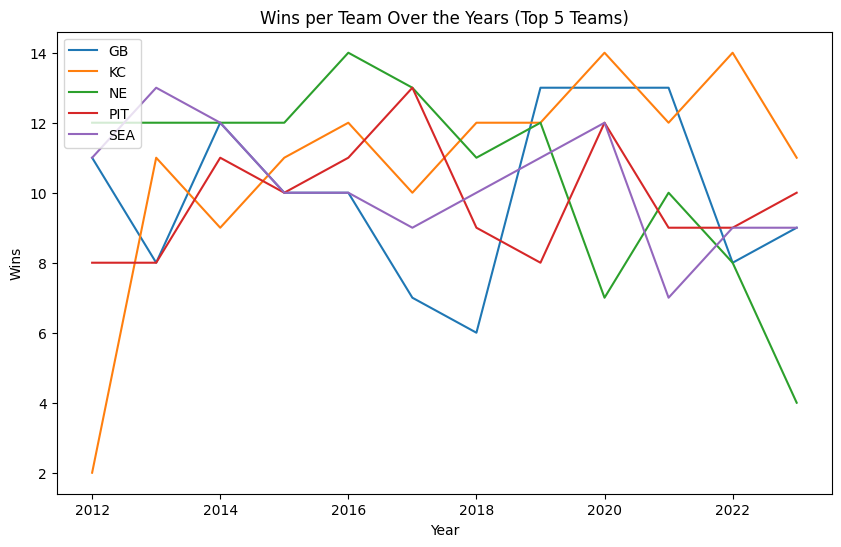

In [12]:
# Top 5
top_teams = df.groupby('team')['wins'].sum().nlargest(5).index

# Filter
filtered_df = df[df['team'].isin(top_teams)]

# Grafics
filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))
plt.title('Wins per Team Over the Years (Top 5 Teams)')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.legend(loc='upper left')
plt.show()

The line chart depicts the performance of five NFL teams (GB, KC, NE, PIT, SEA) from 2012 to 2023 in terms of their number of wins each season.

### Key Observations:
1. **Kansas City Chiefs (KC)**: The Chiefs show a consistent upward trend starting from 2013, peaking around 2020 with the most wins among the teams, before slightly declining in 2023.
2. **Green Bay Packers (GB)**: They exhibit fluctuations with strong performance between 2014 and 2021, but their performance declined sharply in 2022 and 2023.
3. **New England Patriots (NE)**: NE dominated between 2012 and 2019, maintaining consistent high wins, but their performance significantly declined after 2020.
4. **Pittsburgh Steelers (PIT)**: They maintain a relatively consistent but moderate performance, with some fluctuations over the years.
5. **Seattle Seahawks (SEA)**: SEA shows a generally declining trend, particularly in recent years, with their highest performance around 2014-2015.

### General Insights:
- **New England Patriots** and **Kansas City Chiefs** demonstrate dominance for most of the period, with the Chiefs' peak coming more recently, while the Patriots' dominance declines post-2020.
- **Seattle Seahawks** and **Green Bay Packers** have experienced notable declines in recent years.
- The chart highlights the varying consistency across teams, with some like the Chiefs steadily improving while others show more volatility.

This chart effectively visualizes how some NFL teams have risen or fallen over the past decade in terms of wins.

C:\Users\Kai\AppData\Local\Temp\ipykernel_35336\1070455082.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))


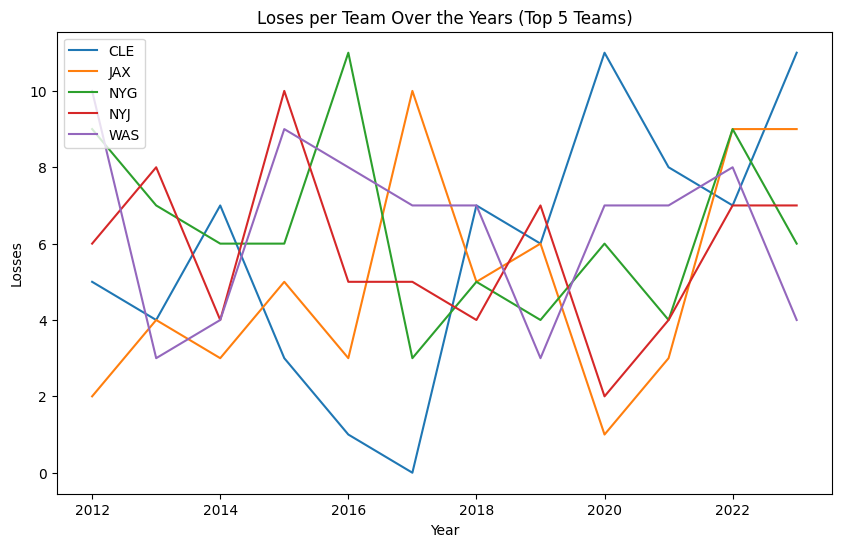

In [13]:
# Top 5
top_teams = df.groupby('team')['losses'].sum().nlargest(5).index

# Filter
filtered_df = df[df['team'].isin(top_teams)]

# Grafics
filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))
plt.title('Loses per Team Over the Years (Top 5 Teams)')
plt.xlabel('Year')
plt.ylabel('Losses')
plt.legend(loc='upper left')
plt.show()

The second line chart visualizes the number of losses for five NFL teams (CLE, JAX, NYG, NYJ, WAS) from 2012 to 2023. Here are the key observations:

### Key Observations:
1. **Cleveland Browns (CLE)**: Their number of losses fluctuates greatly, with a sharp spike in 2017 when they experienced the most losses. They show improvement around 2020 but see another increase in losses by 2023.
2. **Jacksonville Jaguars (JAX)**: JAX displays significant volatility. They had high losses in 2013 and 2020, but also periods of improvement, particularly around 2017 and 2022.
3. **New York Giants (NYG)**: The Giants' losses have remained moderately high, with consistent fluctuations, showing no dramatic improvement or decline.
4. **New York Jets (NYJ)**: NYJ has maintained a consistently high level of losses throughout the period, with occasional dips, but they seem to have been more stable in their struggles.
5. **Washington Football Team (WAS)**: WAS has fluctuated significantly, with notable dips in losses in 2015 and 2021 but more losses in recent years.

### General Insights:
- **Cleveland Browns** stand out for their significant fluctuations, experiencing high losses in certain years (notably 2017) but improving in others.
- **Jacksonville Jaguars** also experience strong volatility, particularly peaking in losses during 2013 and 2020.
- **New York Giants** and **New York Jets** show relatively consistent poor performance with high losses over the years.
- **Washington Football Team** experiences more noticeable ups and downs but manages to avoid the consistent losing seasons seen by the Giants and Jets.

This chart highlights teams that have struggled the most with losses over the years, showcasing volatility and inconsistency in some teams' performance while others remain consistently poor in terms of results.

## Total yards of each team (Box plot)

C:\Users\Kai\AppData\Local\Temp\ipykernel_35336\76092322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='team', y='yards_gained', data=df, palette='rainbow')


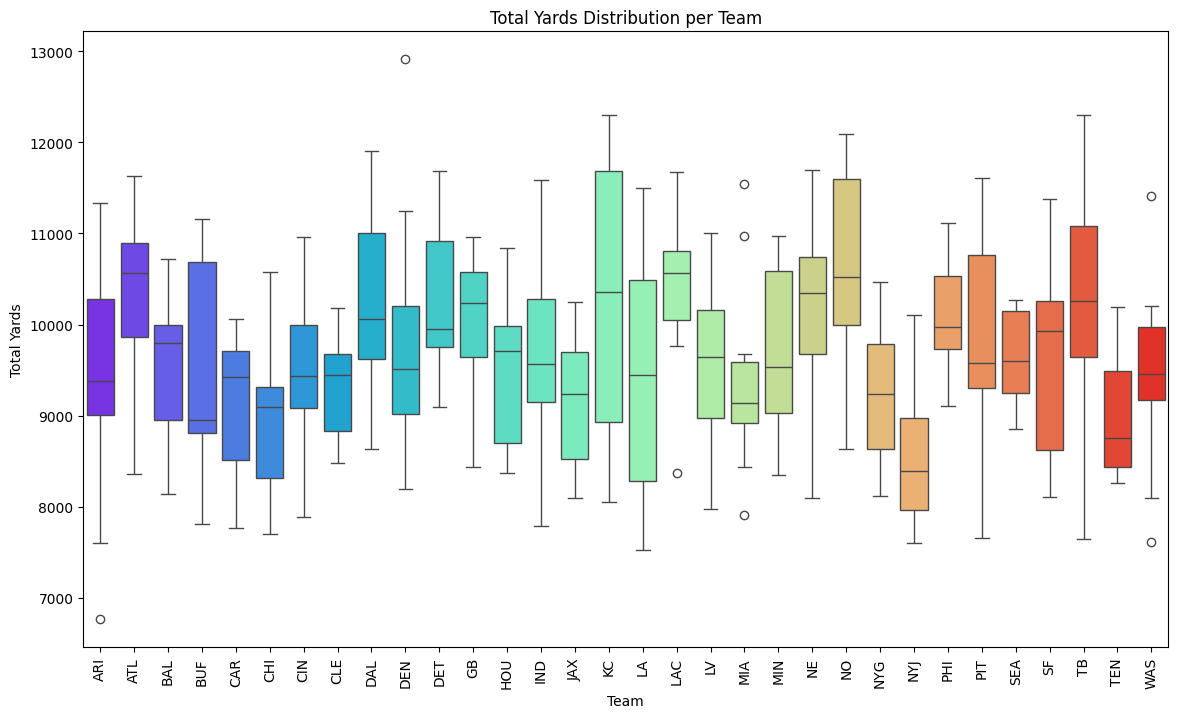

In [14]:
# Plotting total yards distribution per team
plt.figure(figsize=(14,8))
sns.boxplot(x='team', y='yards_gained', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Total Yards Distribution per Team')
plt.xlabel('Team')
plt.ylabel('Total Yards')
plt.show()

From the boxplot, which shows the distribution of total yards per team, we can infer several things:

1. **Spread and Variation**: Teams with wider boxes (e.g., Kansas City (KC), New Orleans (NO)) tend to have more variability in their total yards over the years, whereas teams with smaller boxes (e.g., Houston (HOU), Detroit (DET)) have more consistent yardage performance.
   
2. **Median Performance**: The middle line in each box represents the median total yards. Teams like Kansas City (KC) and New Orleans (NO) have higher median total yards compared to teams like Arizona (ARI) and Houston (HOU), indicating consistently higher offensive yardage.

3. **Outliers**: Some teams show outliers, represented by the dots outside the whiskers of the box. For example, Arizona (ARI) and Washington (WAS) have lower outlier values, which might indicate particularly poor performance in certain seasons.

4. **Top Performers**: Teams like Kansas City (KC) and New Orleans (NO) are among the top performers in terms of both median total yards and the spread of their performance, consistently reaching higher yard totals over the years.

5. **Teams with Low Yardage**: Teams like Arizona (ARI), Houston (HOU), and Washington (WAS) show lower overall yardage, with smaller interquartile ranges and lower median values, indicating these teams tend to struggle more offensively.

This boxplot visually demonstrates which teams are consistently performing at a higher level offensively and which teams have more variability or struggle to maintain high yardage totals.

## Relation between wins and total yards (Scatter Plot)

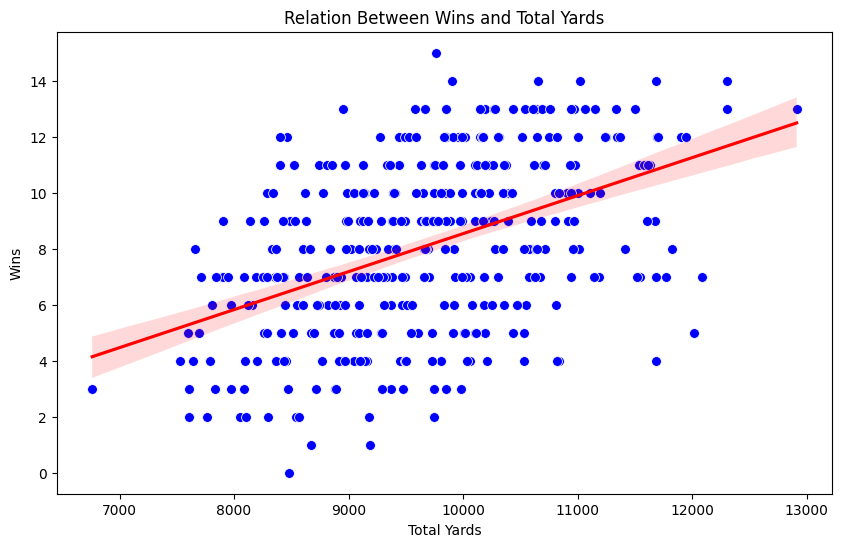

Correlation between Wins and Total Yards: 0.46


In [15]:
# Plotting the relationship between wins and total yards
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yards_gained', y='wins', data=df, color='blue', s=50)

# Adding a regression line to understand the trend
sns.regplot(x='yards_gained', y='wins', data=df, scatter=False, color='red')

# Adding labels and title
plt.title('Relation Between Wins and Total Yards')
plt.xlabel('Total Yards')
plt.ylabel('Wins')

# Show plot
plt.show()

# Calculate the correlation between wins and total yards
correlation = df['wins'].corr(df['yards_gained'])
print(f'Correlation between Wins and Total Yards: {correlation:.2f}')

From the scatter plot and the correlation value of 0.46, we can infer the following:

1. **Moderate Positive Relationship**: A correlation of 0.46 indicates a moderate positive relationship between total yards and wins. This suggests that, in general, teams that gain more total yards tend to win more games, but the relationship is not very strong or absolute.

2. **Not a Perfect Predictor**: While more total yards are associated with more wins, it is clear from the scatter plot that many teams with high total yards still end up with fewer wins, and some teams with lower total yards can also have a decent number of wins. This implies that while yards are important, other factors (like defense, turnovers, penalties) also play a significant role in determining the number of wins.

3. **Wide Distribution**: The points are spread across a wide range, especially for teams with total yards between 8000 to 11000. This indicates variability, where similar yardage can correspond to a different number of wins depending on other circumstances.

4. **Regression Line Insight**: The upward trend of the regression line confirms that as total yards increase, wins generally increase too. However, the points deviate from the line quite a bit, further emphasizing the role of other variables beyond total yards in influencing team success.

In summary, while accumulating more yards contributes to winning games, it is not the sole factor, and the data shows variability that suggests teams must excel in other areas to consistently convert yards into wins.

In [16]:
# Group by team and sum wins
team_wins = df.groupby('team')['wins'].sum().reset_index()

# Sort by wins to get the top and bottom teams
top_5_wins = team_wins.sort_values(by='wins', ascending=False).head(5)
bottom_5_wins = team_wins.sort_values(by='wins', ascending=True).head(5)

# Display the results
print("Top 5 teams with most wins:")
print(top_5_wins)

print("\nBottom 5 teams with least wins (most losses):")
print(bottom_5_wins)


# Group by team and sum the total yards
team_yards = df.groupby('team')['yards_gained'].sum().reset_index()

# Sort by total yards to get the top and bottom teams
top_5_teams = team_yards.sort_values(by='yards_gained', ascending=False).head(5)
bottom_5_teams = team_yards.sort_values(by='yards_gained', ascending=True).head(5)

# Display the results
print("\nTop 5 teams with most total yards:")
print(top_5_teams)

print("\nBottom 5 teams with least total yards:")
print(bottom_5_teams)


Top 5 teams with most wins:
   team  wins
15   KC   130
21   NE   127
27  SEA   123
11   GB   120
26  PIT   118

Bottom 5 teams with least wins (most losses):
   team  wins
14  JAX    60
24  NYJ    69
7   CLE    70
23  NYG    76
31  WAS    77

Top 5 teams with most total yards:
   team  yards_gained
22   NO        128263
17  LAC        124460
1   ATL        123595
29   TB        122988
8   DAL        122958

Bottom 5 teams with least total yards:
   team  yards_gained
24  NYJ        102415
5   CHI        107564
30  TEN        107618
4   CAR        109575
14  JAX        110248


From this data, we can infer the following relationships between total yards gained and wins:

### 1. **Teams with High Wins vs. High Yards:**
- **Top 5 teams with most wins (KC, NE, SEA, GB, PIT)** are notably absent from the list of teams with the most total yards. This suggests that while total yards are important, other factors like defensive performance, special teams, and overall game strategy play a significant role in achieving a high number of wins.
- Teams like **DAL** (Dallas) appear on both the top wins and top total yards lists, showing a strong offensive presence likely contributing to their success.
  
### 2. **Teams with High Yards but Fewer Wins:**
- Teams like **NO** (New Orleans Saints), **LAC** (Los Angeles Chargers), and **ATL** (Atlanta Falcons) appear in the top 5 for total yards but are not in the top 5 for wins. This suggests that these teams may be good at moving the ball but are either inefficient in converting yards to points, or they may have weaknesses in other areas like defense, turnovers, or special teams that prevent them from winning more games.

### 3. **Teams with Low Wins and Low Yards:**
- Teams like **NYJ** (New York Jets) and **JAX** (Jacksonville Jaguars) rank at the bottom in both wins and total yards, confirming that weak offensive performance likely contributes to poor win records. These teams struggle to accumulate yards, which directly correlates with their struggles in winning games.

### 4. **Teams with Low Yards but More Wins:**
- Interestingly, **KC** (Kansas City Chiefs), **NE** (New England Patriots), **SEA** (Seattle Seahawks), **GB** (Green Bay Packers), and **PIT** (Pittsburgh Steelers), despite not appearing in the top total yards, have been very successful in terms of wins. This suggests these teams may compensate for fewer yards with factors like efficient red zone offense, strong defenses, or better turnover margins, highlighting that yards alone are not the sole predictor of success.

### 5. **Bottom Yards vs Bottom Wins:**
- **NYJ** appears at the bottom of both wins and total yards lists, reinforcing the idea that poor offensive production significantly impacts their ability to win games. However, teams like **JAX** and **CHI** appear at the bottom in both lists as well, further emphasizing that low yardage often correlates with fewer wins.

### Conclusion:
While accumulating a lot of total yards tends to help a team's chances of winning, it is not a guaranteed formula for success. Other factors like defense, turnovers, and situational football (such as converting yards into points) can significantly influence a team's win-loss record. Teams with fewer yards can still win games by excelling in these other areas, whereas teams with high yardage may struggle if they lack balance.

# Average Win Loss Percentage

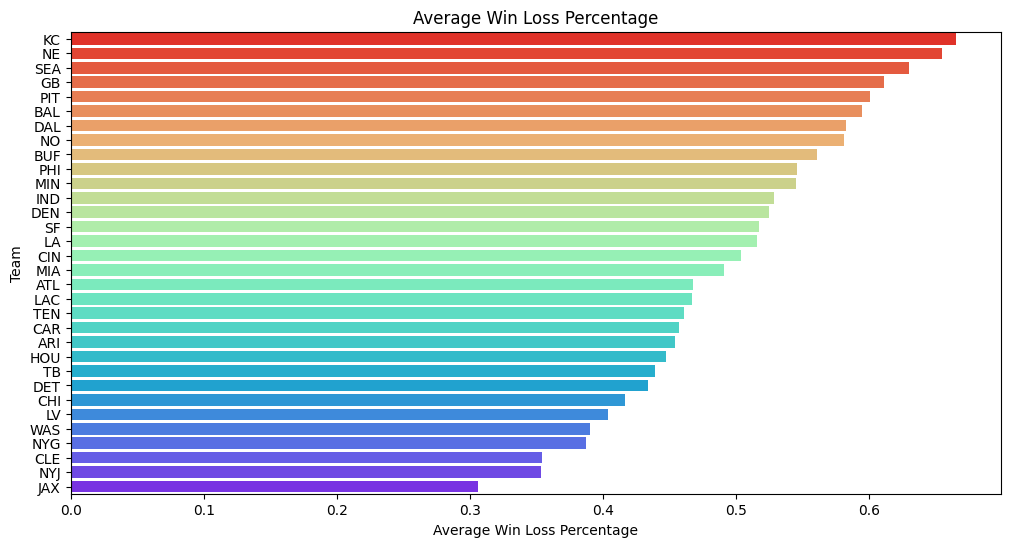

In [17]:
plt.figure(figsize=(12,6))
topWinLoss = df.groupby("team")["win_pct"].mean().sort_values(ascending=False)

# Create the rainbow color palette with red starting at the top
rainbow_colors = sns.color_palette("rainbow", len(topWinLoss))

# Reverse the colors so that red is at the top
rainbow_colors = rainbow_colors[::-1]

# Assign the 'y' variable to 'hue' and set legend to False
sns.barplot(x=topWinLoss, y=topWinLoss.index, hue=topWinLoss.index, palette=rainbow_colors, dodge=False, legend=False)

plt.title("Average Win Loss Percentage")
plt.xlabel("Average Win Loss Percentage")
plt.ylabel("Team")
plt.show()

# Average points per year

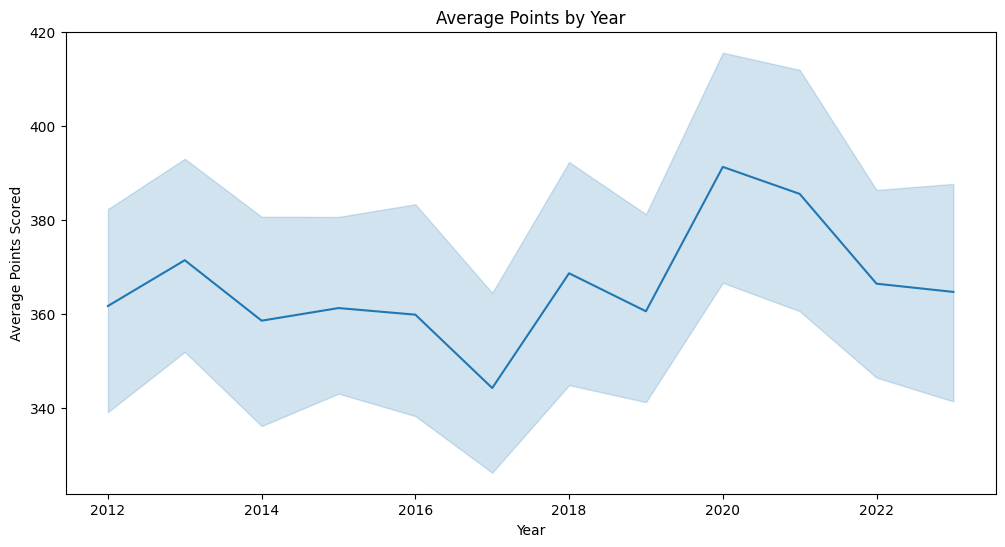

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["season"], y=df["total_points"], estimator="mean")
plt.title("Average Points by Year")
plt.xlabel("Year")
plt.ylabel("Average Points Scored")
plt.show()

# Points each year of the top 5 teams and bottom 5 teams

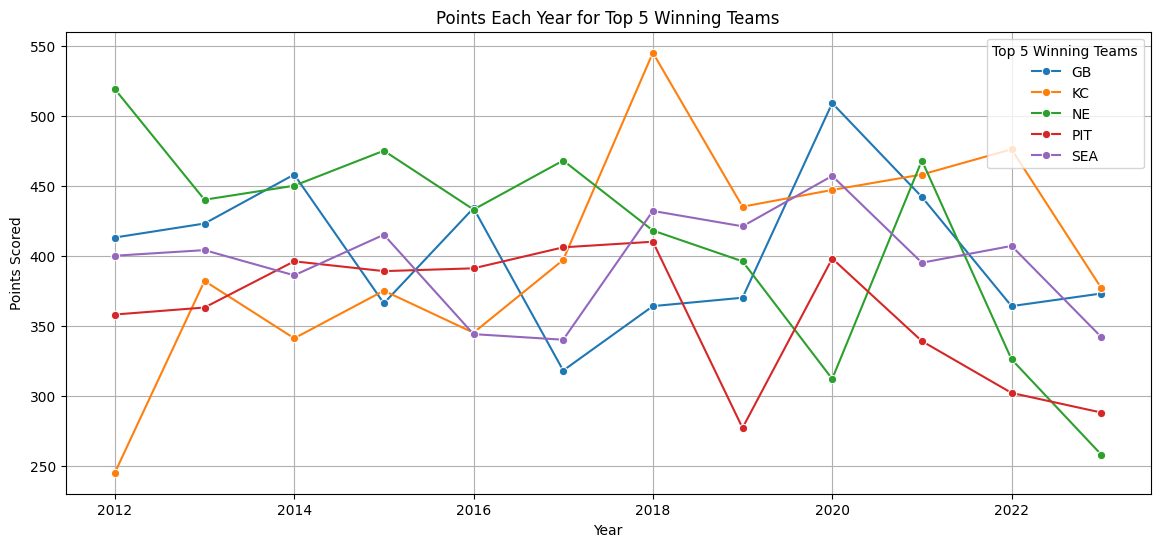

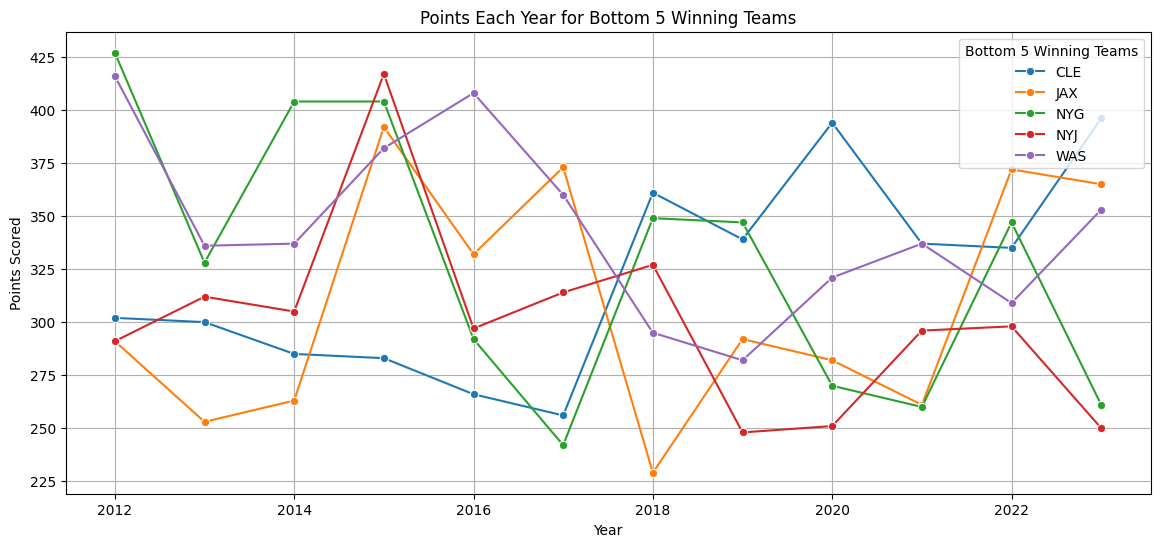

In [19]:

# Group by team and calculate average win percentage for each team
top_5_teams_by_wins = df.groupby('team')['win_pct'].mean().sort_values(ascending=False).head(5).index

# Filter the dataframe to only include the top 5 winning teams
top_5_winning_teams = df[df['team'].isin(top_5_teams_by_wins)]

# Plotting points scored by the top 5 winning teams over the years
plt.figure(figsize=(14,6))
sns.lineplot(data=top_5_winning_teams, x='season', y='total_points', hue='team', marker="o")

# Adding title and labels
plt.title('Points Each Year for Top 5 Winning Teams')
plt.xlabel('Year')
plt.ylabel('Points Scored')

# Displaying legend and grid
plt.legend(title='Top 5 Winning Teams')
plt.grid(True)

# Show the plot
plt.show()


# Group by team and calculate the average win percentage for each team
bottom_5_teams_by_wins = df.groupby('team')['win_pct'].mean().sort_values(ascending=True).head(5).index

# Filter the dataframe to only include the bottom 5 winning teams
bottom_5_winning_teams = df[df['team'].isin(bottom_5_teams_by_wins)]

# Plotting points scored by the bottom 5 winning teams over the years
plt.figure(figsize=(14,6))
sns.lineplot(data=bottom_5_winning_teams, x='season', y='total_points', hue='team', marker="o")

# Adding title and labels
plt.title('Points Each Year for Bottom 5 Winning Teams')
plt.xlabel('Year')
plt.ylabel('Points Scored')

# Displaying legend and grid
plt.legend(title='Bottom 5 Winning Teams')
plt.grid(True)

# Show the plot
plt.show()

From the two charts showing points scored each year for both the top 5 and bottom 5 winning teams, here are some observations:

**General Trends**: 
   - The points scored by the top 5 teams are generally higher and more consistent than the bottom 5 teams.
   - There are noticeable spikes for certain teams (e.g., **Kansas City (KC)** around 2018-2019), indicating standout offensive seasons.
   - Teams like **New England (NE)** and **Seattle (SEA)** maintain relatively stable point totals over the years, although NE experienced a decline after 2018.
   - The scoring trend appears to fluctuate but stays within the 350–500 point range, with occasional dips below 350 points for **Pittsburgh (PIT)** and **Seattle (SEA)**.
   - **Top Teams** maintain a higher floor for points scored, rarely dropping below 300 points in a season.



## What is the average and minimum points needed for a winning season?

In [20]:
# Filter teams that had more wins than losses (positive season)
positive_season_teams = df[df['wins'] > df['losses']]

# Calculate the average points scored by teams with positive seasons
average_points_positive_season = positive_season_teams['total_points'].mean()

# Find the minimum points scored by a team with a positive winning season
min_points_positive_season = positive_season_teams['total_points'].min()

# Print results
print(f"Average points scored for a positive season: {average_points_positive_season}")
print(f"Minimum points scored for a positive season: {min_points_positive_season}")

Average points scored for a positive season: 405.3463687150838
Minimum points scored for a positive season: 277


Based on the data:

- The **average points scored** by teams that had a positive season (more wins than losses) is approximately **405.35 points**.
- The **minimum points scored** by a team with a positive season is **277 points**.

### Interpretation:

- Teams generally need to score **around 405 points** on average in a season to have a winning record.
- The lowest number of points scored by a team that still had a winning record was **277 points**, meaning that it is possible to win more games than lose with fewer points, but it's less common.

In practical terms, aiming for a total of **405 points** or more over the season seems to increase a team's chances of having a positive winning record based on historical data.

### Additional analysis:

- Draw up average and minimum points needed to be the first seed in each conference

# Value of touchdown points, field goal points, and extra points to winning

### 1. **Understanding the Data**
First, we need to gather the relevant columns for:
- **Touchdowns (TD)**: Representing the number of touchdowns scored.
- **Field Goals (FG)**: Representing the number of successful field goals.
- **Extra Points (XP)**: Representing the number of extra points made after touchdowns.
- **Wins**: Representing the total number of wins for a team in a season.

From this, we can calculate:
- **Touchdown Points** = TD * 6
- **Field Goal Points** = FG * 3
- **Extra Points** = XP * 1

The total score for a team in a season is the sum of all these values, and we'll evaluate their impact on the number of wins.

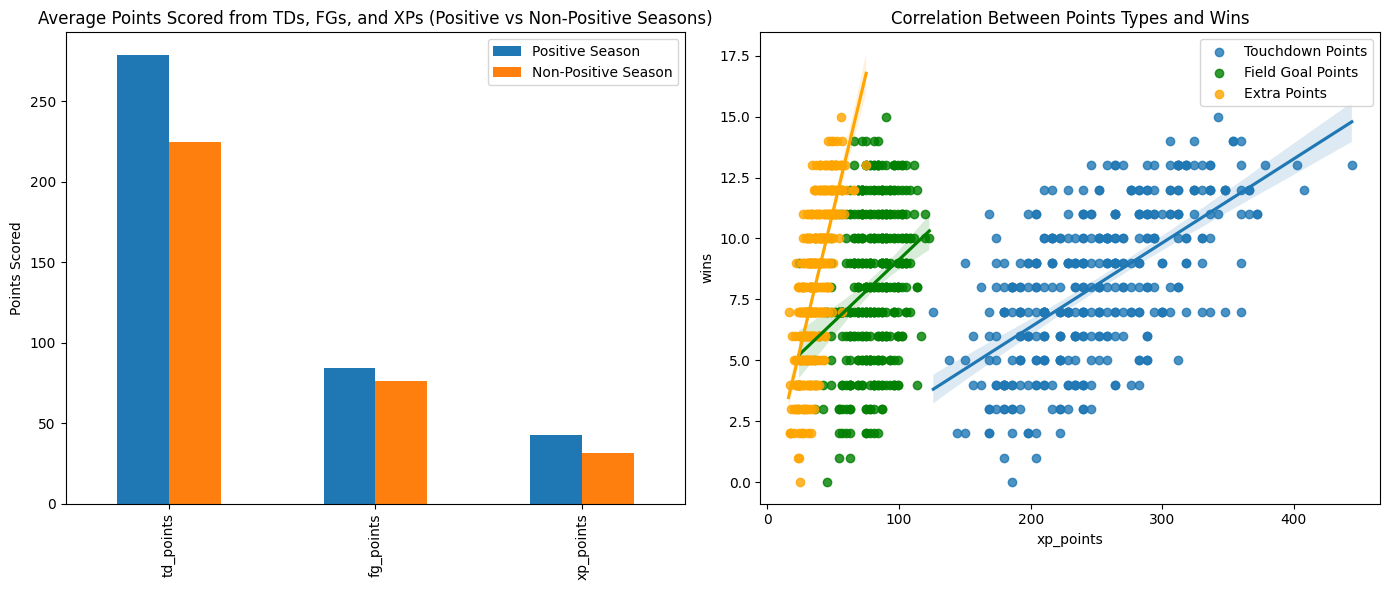

Correlation Matrix:
           td_points  fg_points  xp_points      wins
td_points   1.000000  -0.060086   0.897915  0.615691
fg_points  -0.060086   1.000000   0.003620  0.280789
xp_points   0.897915   0.003620   1.000000  0.707368
wins        0.615691   0.280789   0.707368  1.000000


In [21]:
# Filter relevant columns for the analysis
columns_of_interest = ['td_points', 'fg_points', 'xp_points', 'wins', 'win_pct']
data = df[columns_of_interest]

# Check for any missing values
data.isnull().sum()

# A. Summary statistics for teams with a positive winning season (more than 8 wins) and non-positive seasons
positive_season = data[data['wins'] > 8]
non_positive_season = data[data['wins'] <= 8]

# Calculate mean values for positive and non-positive seasons
avg_positive = positive_season[['td_points', 'fg_points', 'xp_points']].mean()
avg_non_positive = non_positive_season[['td_points', 'fg_points', 'xp_points']].mean()

# B. Correlation matrix between points types and wins
correlation = data[['td_points', 'fg_points', 'xp_points', 'wins']].corr()

# C. Visualization

# Bar chart for comparison between positive and non-positive seasons
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

avg_comparison = pd.DataFrame({'Positive Season': avg_positive, 'Non-Positive Season': avg_non_positive})
avg_comparison.plot(kind='bar', ax=ax[0])
ax[0].set_title('Average Points Scored from TDs, FGs, and XPs (Positive vs Non-Positive Seasons)')
ax[0].set_ylabel('Points Scored')

# Scatter plots to show correlation with Wins
sns.regplot(x='td_points', y='wins', data=data, ax=ax[1], label='Touchdown Points')
sns.regplot(x='fg_points', y='wins', data=data, ax=ax[1], label='Field Goal Points', color='green')
sns.regplot(x='xp_points', y='wins', data=data, ax=ax[1], label='Extra Points', color='orange')
ax[1].legend()
ax[1].set_title('Correlation Between Points Types and Wins')

plt.tight_layout()
plt.show()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation)


### 1. **Bar Chart: Points Comparison (Positive vs Non-Positive Seasons)**
- **Touchdown Points (td_points)**: Teams with positive seasons (more than 8 wins) scored significantly more touchdown points compared to teams with non-positive seasons. This suggests that touchdowns are a crucial factor for a team's success.
- **Field Goal Points (fg_points)**: The difference in field goal points between positive and non-positive seasons is less pronounced, indicating that while field goals contribute to scoring, they may not be as strongly associated with achieving a winning season.
- **Extra Points (xp_points)**: Extra points, which are typically scored following touchdowns, also show a noticeable difference between positive and non-positive seasons, further reinforcing the importance of touchdowns for winning seasons.

### 2. **Scatter Plot: Correlation Between Point Types and Wins**
- **Touchdown Points** (blue): There is a clear positive correlation between touchdown points and wins, with more touchdown points leading to more wins. The upward trendline shows that teams with higher touchdown scores tend to have more wins.
- **Field Goal Points** (green): There is a weaker positive correlation between field goal points and wins. Although field goals contribute to overall scoring, their impact on winning appears less significant compared to touchdowns.
- **Extra Points** (orange): Extra points are highly correlated with wins, as they are directly tied to touchdowns. Teams with more extra points tend to have more wins, although the correlation is somewhat weaker than touchdown points.

### 3. **Correlation Matrix**
- **Touchdown Points (td_points)** have a correlation of **0.615** with wins, showing a moderately strong positive relationship. This means that touchdowns are a key contributor to winning games.
- **Field Goal Points (fg_points)** have a correlation of **0.280** with wins, which is relatively weak. While field goals contribute to scoring, they are less impactful than touchdowns for winning.
- **Extra Points (xp_points)** have a correlation of **0.707** with wins, which is even stronger than touchdowns. This is because extra points directly follow touchdowns, so they accumulate in proportion to touchdown success.
- **Touchdown Points and Extra Points** have a very high correlation (**0.897**), which is expected since extra points typically follow touchdowns.

### Key Takeaways:
- **Touchdowns are the most impactful type of scoring** for a team's success, as evidenced by both the bar chart and the correlation of touchdown points with wins.
- **Extra points**, while directly tied to touchdowns, are also strongly correlated with winning, indicating that teams scoring many touchdowns naturally accumulate extra points.
- **Field goals** play a role in scoring but are less significant for determining whether a team has a winning season.

In summary, touchdowns are the biggest factor in a team's success, with extra points closely following, while field goals have a more moderate effect.

## Regression model to calculate touchdown points needed to have a winning season

In [22]:
import statsmodels.api as sm
# Selecting relevant columns for touchdown points and wins
data = df[['td_points', 'wins']].dropna()

# Fitting a linear regression model to predict wins based on touchdown points
X = data['td_points']
y = data['wins']

# Adding constant for intercept
X = sm.add_constant(X)

# Performing the regression
model = sm.OLS(y, X).fit()

# Predicting the number of touchdown points required for 9 wins (a winning season)
touchdown_points_for_winning = (9 - model.params['const']) / model.params['td_points']

touchdown_points_for_winning, model.summary()

(276.23767536749216,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   wins   R-squared:                       0.379
 Model:                            OLS   Adj. R-squared:                  0.377
 Method:                 Least Squares   F-statistic:                     233.2
 Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.95e-41
 Time:                        14:24:10   Log-Likelihood:                -883.07
 No. Observations:                 384   AIC:                             1770.
 Df Residuals:                     382   BIC:                             1778.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------

From the OLS regression results, we can interpret the following about the relationship between touchdown points and the number of wins:

1. **Model Performance**: 
   - The **R-squared value** is 0.379, meaning approximately 37.9% of the variance in wins is explained by the number of touchdown points. While this suggests a moderate relationship, there are other factors not captured in this model that also influence wins.
   - The **Adjusted R-squared** is 0.377, which is close to the R-squared value, indicating that the model doesn't lose much explanatory power even after accounting for the number of predictors.

2. **Coefficient (td_points)**: 
   - The coefficient for **td_points** is **0.0345**. This means that for every additional touchdown point a team scores, the number of wins increases by 0.0345 on average. 
   - So, for example, scoring an extra 100 touchdown points could increase a team's win count by approximately 3.45 wins (100 * 0.0345).

3. **Constant (Intercept)**:
   - The **intercept (const)** is **-0.5346**, but it is not statistically significant (p-value = 0.356). This implies that without scoring any touchdown points, the model does not provide a meaningful prediction for wins.

4. **Statistical Significance**:
   - The **P-value** for the touchdown points coefficient is **0.000**, meaning the relationship between touchdown points and wins is highly significant.
   - The **F-statistic** of 233.2 and the extremely low p-value (1.95e-41) further indicate that touchdown points significantly explain the variance in wins.

### Insights:
- Touchdown points have a positive and significant impact on the number of wins a team can achieve.
- The model indicates that increasing touchdown points is strongly associated with an increase in wins, although the relationship is not the sole factor (as shown by the R-squared value).
- To calculate how many touchdown points are needed to achieve a specific number of wins, you can use the regression equation: 

   $ \text{Wins} = 0.0345 \times \text{Touchdown Points} - 0.5346 $

If you want a specific number of wins (like 9 for a positive season), you can solve this equation for the number of touchdown points needed.

## Example calculation
To determine the required number of touchdowns per game and total touchdowns for a winning season (defined as having more wins than losses, typically 9 or more wins in a 17-game NFL season), we can use the regression equation derived from the analysis.

The equation for wins is:

$\text{Wins} = 0.0345 \times \text{Touchdown Points} - 0.5346$

For a winning season (let's assume at least 9 wins):

$9 = 0.0345 \times \text{Touchdown Points} - 0.5346$

### Step 1: Solve for the required Touchdown Points
We solve for the total touchdown points needed:

$9 + 0.5346 = 0.0345 \times \text{Touchdown Points}$

$9.5346 = 0.0345 \times \text{Touchdown Points}$

$ \text{Touchdown Points} = \frac{9.5346}{0.0345} \approx 276.37 $

So, approximately **276 touchdown points** are needed to achieve 9 wins.

### Step 2: Convert Touchdown Points to Total Touchdowns
Since each touchdown is worth 6 points, we can find the number of touchdowns required by dividing the total touchdown points by 6:

$ \text{Total Touchdowns} = \frac{276.37}{6} \approx 46.06$

This means a team would need to score **around 46 touchdowns** in total to have a winning season.

### Step 3: Calculate Touchdowns Per Game
Since the NFL regular season consists of 17 games, the average touchdowns per game needed are:

$ \text{Touchdowns per Game} = \frac{46.06}{17} \approx 2.71 $

### Step 4: Calculate Touchdown Points Per Game
To calculate the **touchdown points per game**, take the total touchdown points needed (276.37) and divide by the 17-game NFL season. Here’s the calculation:

$ \text{Touchdown Points per Game} = \frac{276.37}{17} \approx 16.26 $

So, the team would need to average approximately **16.26 touchdown points per game** to reach 9 wins.

### Summary:
- **Total Touchdowns**: Approximately **46 touchdowns** are needed for a winning season.
- **Touchdowns per Game**: A team needs to score around **2.71 touchdowns per game** on average to achieve at least 9 wins in a 17-game season.
- **Touchdowns points per Game**: A team would need to average approximately **16.26 touchdown points per game** to reach 9 wins.

### Next steps

- How many touchdown points are needed to achieve the top seed in each conference

## Relation between passing yards and rushing yards

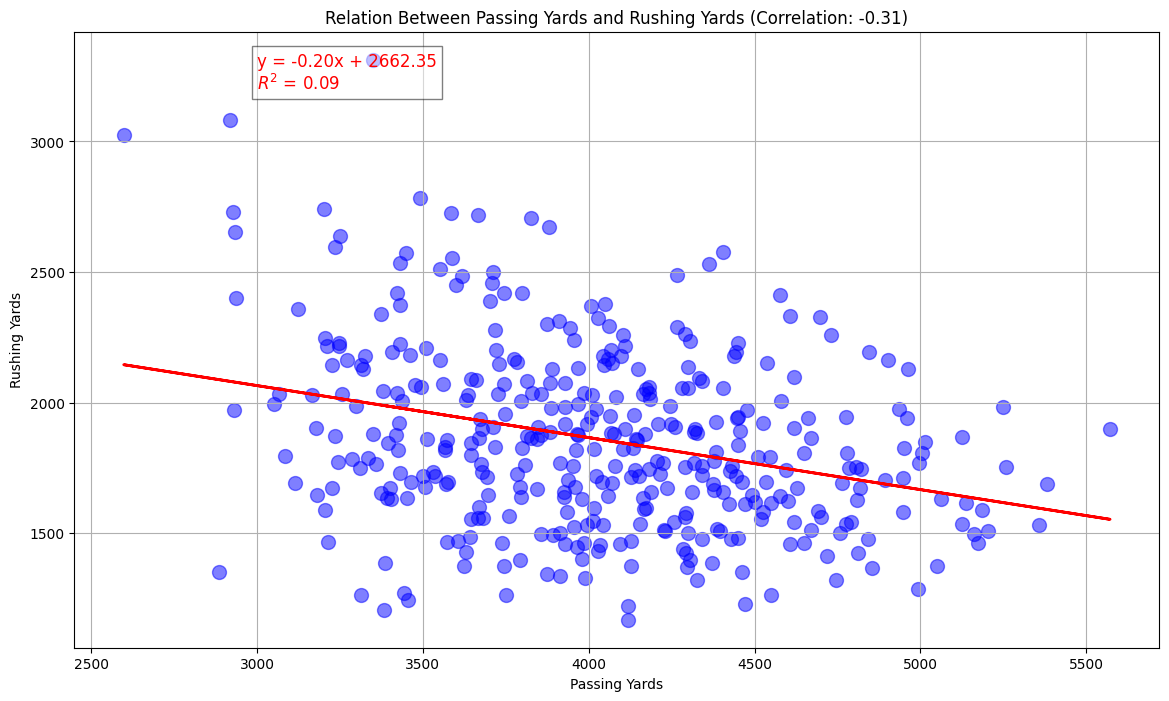

In [23]:
# Calculating the correlation coefficient between passing and rushing yards
corr = df['passing_yards'].corr(df['rushing_yards'])

# Fitting a regression line
m, b = np.polyfit(df['passing_yards'], df['rushing_yards'], 1)

# Calculate R-squared (coefficient of determination)
r_squared = corr**2


# Plotting relation between passing yards and rushing yards with enhanced readability
plt.figure(figsize=(14,8))
plt.scatter(df['passing_yards'], df['rushing_yards'], c='blue', alpha=0.5, s=100)  # s=100 sets marker size

# Plotting the regression line
plt.plot(df['passing_yards'], m * df['passing_yards'] + b, color='red', linewidth=2)  # regression line in red

plt.title('Relation Between Passing Yards and Rushing Yards (Correlation: {:.2f})'.format(corr))
plt.xlabel('Passing Yards')
plt.ylabel('Rushing Yards')

# Adding grid for better readability
plt.grid(True)

# Adding the equation of the regression line as text on the plot
plt.text(3000, 3200, 'y = {:.2f}x + {:.2f}\n$R^2$ = {:.2f}'.format(m, b, r_squared), 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


From the scatter plot, showing the relationship between passing yards and rushing yards, you can infer the following:

1. **No Strong Correlation**: There does not seem to be a strong linear relationship between passing yards and rushing yards. The points are widely dispersed, indicating that teams with high passing yards do not necessarily have high rushing yards, and vice versa.

2. **Balanced Distribution**: Most teams fall within a certain range (3000-4500 passing yards, 1500-2500 rushing yards). This suggests that teams tend to have a somewhat balanced offensive strategy between passing and rushing, but outliers exist where some teams excel more in one area.

3. **Outliers**: There are a few outliers where teams have unusually high rushing yards (above 3000) or passing yards (over 5000). These teams may be more specialized in one form of offense.

4. **Complementary Strategies**: The negative correlation could suggest that teams may focus on one aspect of their offensive game more than the other—either relying more on passing or on rushing. This could indicate that teams often choose to specialize rather than balance both rushing and passing yards equally.

5. **\( R^2 \) Value**:The negative slope and low \( R^2 \) value (0.09) suggest a weak, inverse relationship between passing and rushing yards, with passing yards explaining only 9% of the variability in rushing yards. This indicates that other factors likely play a more significant role in determining rushing yards.

6. **Y-intercept Value**:The y-intercept of 2662.35 indicates that when passing yards are zero, the model predicts 2662.35 rushing yards. However, since this scenario is unrealistic in actual gameplay, the intercept mainly reflects a baseline value from the linear relationship but doesn't have much practical significance for NFL teams.
  


### Suggestions for Further Analysis
- **Categorize by Winning Teams**: It might be interesting to split the data based on team success (e.g., high-win vs. low-win teams) and see if high-performing teams rely more on passing or rushing. 
- **Color by Category (optional)**: To add depth to the visualization, you can color the points by categories such as team rankings, conference, or even wins. This could help reveal if high-performing teams favor passing or rushing offenses.



# Fumbles, interceptions, incomplete, and turnover


To evaluate the impact of **fumbles** on a team's ability to win games, we can explore the relationship between fumbles (both total fumbles and fumbles lost) and the number of wins. The fumble-related columns from the dataset that are relevant for this analysis are:

- `fumble`: Total number of fumbles by the team.
- `fumble_lost`: The number of times the team lost possession due to a fumble.

### 1. Correlation Analysis

We can compute the correlation between these fumble-related metrics and wins to understand the general relationship.

#### Correlation Results:
- **Fumbles and Wins**: This shows whether more fumbles are associated with winning or losing.
- **Fumbles Lost and Wins**: This shows how losing possession due to fumbles correlates with wins.

### 2. Regression Analysis

We can perform a linear regression to estimate how much **fumbles** and **fumbles lost** contribute to the number of wins. This would tell us quantitatively how fumbles affect winning outcomes.

Using a simple linear regression model, the relationship might look like this:

$$
\text{Wins} = \beta_0 + \beta_1 \times \text{fumble} + \beta_2 \times \text{fumble\_lost}
$$


Where:
$$ \beta_1 \text{ and } \beta_2 $$

are the coefficients that indicate how much wins decrease (or increase) with each additional fumble or fumble lost.

### 3. Expected Outcome

Typically, fumbles (and especially **fumbles lost**) negatively impact a team’s chances of winning games. Losing possession of the ball gives the opposing team more opportunities to score and reduces the offensive momentum. We would expect:
- A **negative correlation** between **fumbles lost** and **wins**, meaning more fumbles lost likely leads to fewer wins.
- A smaller or weaker negative correlation between total **fumbles** and wins, as not all fumbles lead to lost possession.

In [24]:
# Select relevant columns for analysis
fumble_data = df[['fumble', 'fumble_lost', 'wins']]

# Calculate correlation between fumbles, fumbles lost, and wins
fumble_correlation = fumble_data.corr()

# Perform regression analysis to assess the impact of fumbles and fumbles lost on wins
import statsmodels.api as sm

# Define independent variables (fumbles and fumbles lost) and dependent variable (wins)
X = fumble_data[['fumble', 'fumble_lost']]
y = fumble_data['wins']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
fumble_model = sm.OLS(y, X).fit()

# Get regression summary
fumble_summary = fumble_model.summary()

# Output correlation and regression results
fumble_correlation, fumble_summary




(               fumble  fumble_lost      wins
 fumble       1.000000     0.695449 -0.288251
 fumble_lost  0.695449     1.000000 -0.284644
 wins        -0.288251    -0.284644  1.000000,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   wins   R-squared:                       0.097
 Model:                            OLS   Adj. R-squared:                  0.092
 Method:                 Least Squares   F-statistic:                     20.42
 Date:                Fri, 01 Nov 2024   Prob (F-statistic):           3.76e-09
 Time:                        14:24:10   Log-Likelihood:                -955.02
 No. Observations:                 384   AIC:                             1916.
 Df Residuals:                     381   BIC:                             1928.
 Df Model:                           2                                         
 Covariance Type:            nonrobust       

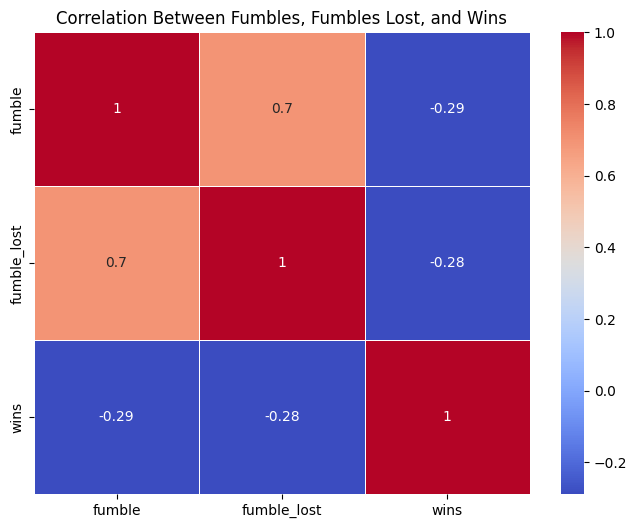

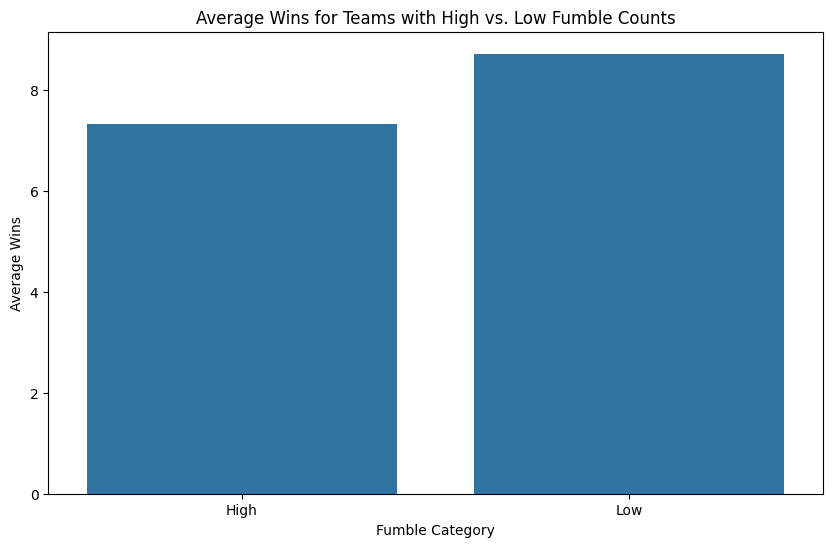

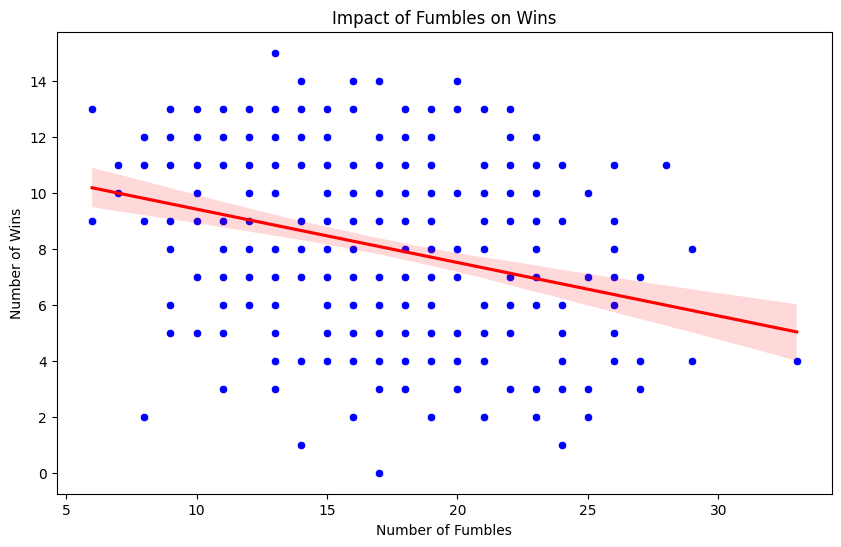

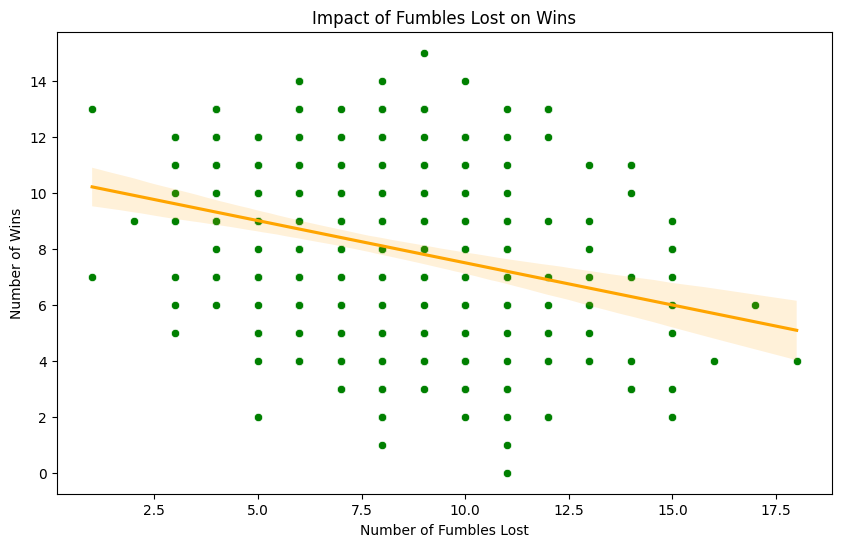

In [25]:
# Select relevant columns for visualization
columns_of_interest = ['fumble', 'fumble_lost', 'wins']
df_selected = df[columns_of_interest]

# Create correlation heatmap
plt.figure(figsize=(8,6))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Between Fumbles, Fumbles Lost, and Wins")
plt.show()


df_selected = df[columns_of_interest].copy()  # Create a true copy of the DataFrame

# Create thresholds for fumble and fumble_lost
threshold_fumble = df['fumble'].median()
threshold_fumble_lost = df['fumble_lost'].median()

# Use .loc to avoid SettingWithCopyWarning
df_selected.loc[:, 'fumble_category'] = df_selected['fumble'].apply(lambda x: 'High' if x > threshold_fumble else 'Low')
df_selected.loc[:, 'fumble_lost_category'] = df_selected['fumble_lost'].apply(lambda x: 'High' if x > threshold_fumble_lost else 'Low')

# Bar Plot for average wins based on fumble category
plt.figure(figsize=(10, 6))
avg_wins_by_fumble = df_selected.groupby('fumble_category')['wins'].mean().reset_index()
sns.barplot(x='fumble_category', y='wins', data=avg_wins_by_fumble)  # Removed palette parameter
plt.title('Average Wins for Teams with High vs. Low Fumble Counts')
plt.ylabel('Average Wins')
plt.xlabel('Fumble Category')
plt.show()

# Scatter Plot with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fumble', y='wins', data=df_selected, color='blue')
sns.regplot(x='fumble', y='wins', data=df_selected, scatter=False, color='red')
plt.title('Impact of Fumbles on Wins')
plt.xlabel('Number of Fumbles')
plt.ylabel('Number of Wins')
plt.show()

# Optional: Scatter Plot for Fumbles Lost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fumble_lost', y='wins', data=df_selected, color='green')
sns.regplot(x='fumble_lost', y='wins', data=df_selected, scatter=False, color='orange')
plt.title('Impact of Fumbles Lost on Wins')
plt.xlabel('Number of Fumbles Lost')
plt.ylabel('Number of Wins')
plt.show()

Based on the correlation matrix and regression analysis results, here are the key findings regarding how fumbles affect a team's winning performance:

1. **Correlation Matrix**:
   - There is a negative correlation between both **fumbles** and **wins** (-0.288) as well as **fumbles lost** and **wins** (-0.285). This suggests that as the number of fumbles or fumbles lost increases, the number of wins decreases.
   - Fumbles and fumbles lost have a strong positive correlation (0.695), indicating that teams that fumble more often tend to lose possession of the ball frequently.

2. **OLS Regression Results**:
   - The model shows an **R-squared value of 0.097**, meaning that approximately 9.7% of the variability in wins can be explained by the number of fumbles and fumbles lost.
   - Both **fumble** and **fumble_lost** have statistically significant negative coefficients:
     - For every additional fumble, the team is expected to win **0.1157 fewer games**.
     - For every additional fumble lost, the team is expected to win **0.1726 fewer games**.
   - Both fumble-related variables have p-values less than 0.05 (fumble: 0.010, fumble_lost: 0.017), indicating that they have a statistically significant impact on the number of wins.

### Conclusion:
The analysis suggests that fumbles (especially lost fumbles) negatively impact a team's chance of winning. As fumbles and fumbles lost increase, the likelihood of a winning season decreases. This highlights the importance of minimizing turnovers to improve team performance and win more games.

### Additional:
- Average fumbles for a losing season

## Correlation of interceptions on a team's ability to win games

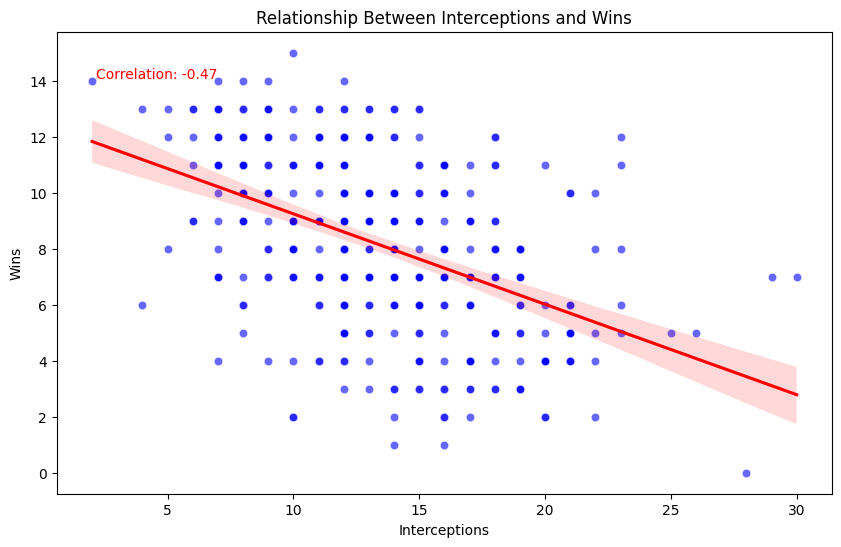

In [26]:
# Calculate correlation
correlation = df['interception'].corr(df['wins'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='interception', y='wins', data=df, color='b', alpha=0.6)
sns.regplot(x='interception', y='wins', data=df, scatter=False, color='r')
plt.xlabel("Interceptions")
plt.ylabel("Wins")
plt.title("Relationship Between Interceptions and Wins")

# Add correlation annotation
plt.text(0.05, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, color="red")

plt.show()

This plot shows a scatter plot analyzing the relationship between interceptions and wins for NFL teams, with a negative correlation coefficient of -0.47. This suggests a moderate inverse relationship, indicating that as the number of interceptions increases, the number of wins tends to decrease. The red regression line shows a downward trend, reinforcing this inverse relationship, and the shaded area represents the confidence interval for the regression line.



To determine the minimum number of interceptions a team can allow per game or per season to have a winning season (typically defined as more than 8 wins in a 16-game season or 9 wins in a 17-game season), we can use the regression line from the graph and the correlation data provided.

Assuming we approximate the relationship between interceptions and wins with a linear regression equation derived from the plot:

$
\text{Wins} = m \times \text{Interceptions} + b
$

Given that the plot shows a negative slope and a correlation of -0.47, we can approximate a relationship, but we'd need the exact equation to make precise predictions. However, let's assume you have a basic form of this line, and let's take the winning season threshold as follows:

1. **For a 16-game season**, a team needs at least 9 wins to have a winning season.
2. **For a 17-game season**, a team needs at least 9 wins as well.

Using these thresholds, we can solve for the maximum number of interceptions that would still yield a winning season, assuming the approximate line from the graph.



In [27]:
# Filter relevant columns (wins and interceptions)
data = df[['wins', 'interception']].dropna()

# Define the target and feature
X = data['interception']
y = data['wins']

# Add a constant to the predictor variable for statsmodels
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate the threshold for a winning season
intercept = model.params['const']
slope = model.params['interception']
target_wins = 9
max_interceptions = (target_wins - intercept) / slope
print(f"Maximum interceptions for a winning season (9 wins): {max_interceptions:.2f}")



                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           7.66e-23
Time:                        14:24:11   Log-Likelihood:                -925.85
No. Observations:                 384   AIC:                             1856.
Df Residuals:                     382   BIC:                             1864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.4751      0.440     28.379   

To convert the season threshold of approximately 10.76 interceptions into a per-game average, we can divide it by the number of games in a season:

For a 17-game season:
$
\frac{10.76}{17} \approx 0.63 \text{ interceptions per game}
$

For a 16-game season:
$
\frac{10.76}{16} \approx 0.67 \text{ interceptions per game}
$

So, to maintain a winning season, a team should aim to limit interceptions to about **0.63 per game in a 17-game season** or **0.67 per game in a 16-game season**. This translates to roughly 1 interception every 1.5 to 2 games, supporting a better chance of achieving a winning record.

## Effect of incompletes on wins

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     46.02
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           4.48e-11
Time:                        14:24:11   Log-Likelihood:                -952.73
No. Observations:                 384   AIC:                             1909.
Df Residuals:                     382   BIC:                             1917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.3098      1.074     

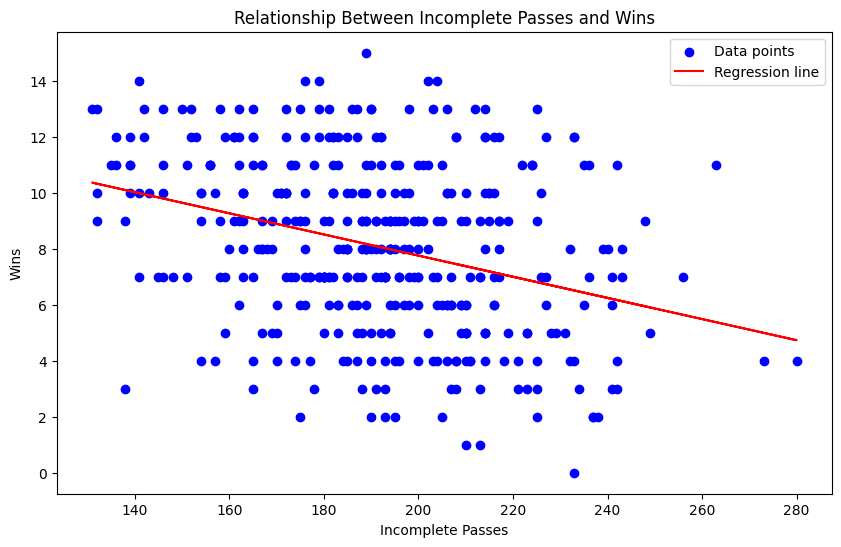

In [28]:
# Filter relevant columns (wins and incompletes)
data = df[['wins', 'incomplete_pass']].dropna()

# Define the target and feature
X = data['incomplete_pass']
y = data['wins']

# Add a constant to the predictor variable for statsmodels
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate the threshold for a winning season
intercept = model.params['const']
slope = model.params['incomplete_pass']
target_wins = 9
max_incompletes = (target_wins - intercept) / slope
print(f"Maximum incomplete passes for a winning season (9 wins): {max_incompletes:.2f}")

# Plot the regression line and data
plt.figure(figsize=(10, 6))
plt.scatter(data['incomplete_pass'], data['wins'], color='blue', label="Data points")
plt.plot(data['incomplete_pass'], model.predict(X), color='red', label="Regression line")
plt.xlabel("Incomplete Passes")
plt.ylabel("Wins")
plt.title("Relationship Between Incomplete Passes and Wins")
plt.legend()
plt.show()

The result from the linear regression analysis shows that the maximum number of incomplete passes a team should aim for over a season to have a winning record (at least 9 wins) is approximately **167.02**.

### Per-Game Conversion

To convert this to a per-game average for different season lengths:

- **For a 17-game season**:
  $
  \frac{167.02}{17} \approx 9.83 \text{ incomplete passes per game}
  $

- **For a 16-game season**:
  $
  \frac{167.02}{16} \approx 10.44 \text{ incomplete passes per game}
  $

So, to maintain a winning season, a team should aim to limit incomplete passes to about **9.83 per game in a 17-game season** or **10.44 per game in a 16-game season**.

### Interpretation

The negative slope of -0.0378 indicates that fewer incomplete passes are generally associated with more wins. While the \( R^2 \) value (0.108) suggests that incomplete passes alone don't strongly predict wins (only about 10.8% of the variance in wins is explained by incomplete passes), the relationship is still statistically significant, as indicated by the low p-value. This means that minimizing incomplete passes does contribute to improving a team's win chances, though it’s likely one of several important factors.

The plot shows the relationship between incomplete passes and wins for NFL teams. There is a slight negative trend, as indicated by the red regression line, suggesting that as incomplete passes increase, the number of wins tends to decrease. The regression line, however, has a relatively shallow slope, which aligns with the low 
𝑅
2
R 
2
  value (0.108) from the OLS results. This means that incomplete passes do have some association with fewer wins, but they don't strongly predict the overall number of wins by themselves.

The threshold of approximately 167 incomplete passes for a winning season corresponds to about 9.83 incomplete passes per game in a 17-game season. Therefore, teams aiming to maximize their win potential should ideally keep their incomplete passes around this level or lower. However, given the low correlation, incomplete passes are only one factor among many that contribute to a team's success.

## Impact of turnover on wins

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     56.43
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           3.43e-30
Time:                        14:24:11   Log-Likelihood:                -903.82
No. Observations:                 384   AIC:                             1816.
Df Residuals:                     380   BIC:                             1831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.3659      0.591  

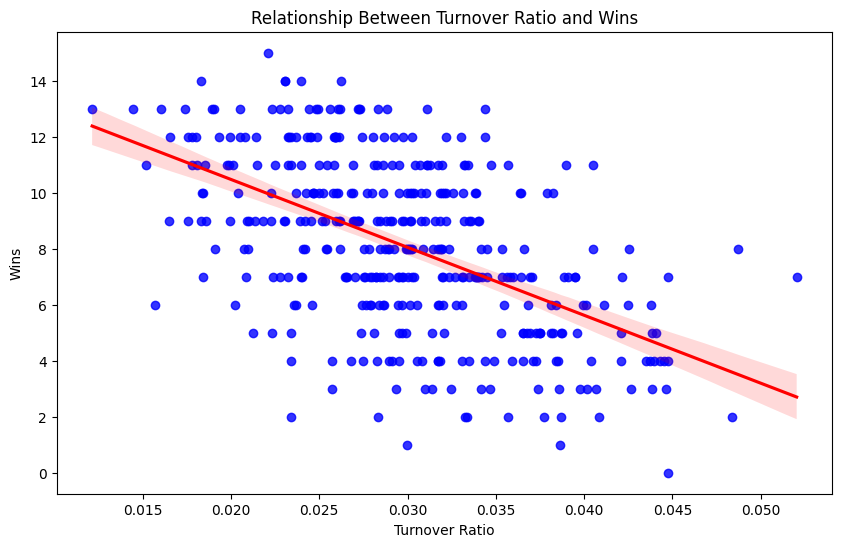

In [29]:
X = df[['turnover_ratio', 'fumble_lost', 'pass_fumble_lost']]
y = df['wins']

# Add a constant to the predictors for the intercept in the regression model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Calculate and display correlation between turnover-related metrics and wins
correlation = df[['turnover_ratio', 'fumble_lost', 'pass_fumble_lost', 'wins']].corr()
print("Correlation between Turnovers and Wins:\n", correlation['wins'])

# Plot turnover ratio vs. wins to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='turnover_ratio', y='wins', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between Turnover Ratio and Wins')
plt.xlabel('Turnover Ratio')
plt.ylabel('Wins')
plt.show()

The regression results and correlation analysis provide insights into how turnovers affect team wins. Here’s a breakdown of what each finding indicates:

1. **R-squared (0.308)**: This value suggests that around 30.8% of the variance in wins can be explained by the turnover variables (`turnover_ratio`, `fumble_lost`, and `pass_fumble_lost`). While not very high, this indicates that turnovers are a significant factor in wins, though other variables (like offense, defense, and special teams) also play a role.

2. **Coefficients**:
   - **Turnover Ratio (-250.25)**: This coefficient is quite large and negative, meaning that as the turnover ratio increases, wins significantly decrease. For every 1 unit increase in the turnover ratio, wins decrease by about 250 on average, according to this model. This large effect suggests that limiting turnovers is highly important for achieving a winning season.
   - **Fumble Lost (0.21)**: This small positive coefficient is somewhat surprising. It indicates a slight increase in wins as fumbles lost increase, but this effect is small and could be due to interaction effects or anomalies in the data. Generally, we expect fumbles lost to negatively impact wins.
   - **Pass Fumble Lost (-0.299)**: A negative coefficient here implies that each additional lost pass fumble correlates with a small decrease in wins. This aligns with expectations, as losing fumbles on passing plays can disrupt offensive momentum.

3. **P-values**:
   - All variables have p-values less than 0.05, indicating that they are statistically significant. This implies a reliable association between these turnover metrics and wins, particularly the turnover ratio.

4. **Correlations**:
   - **Turnover Ratio (-0.538)**: There’s a moderately strong negative correlation between turnover ratio and wins. This implies that higher turnover ratios are associated with fewer wins.
   - **Fumble Lost (-0.285)** and **Pass Fumble Lost (-0.300)**: These also show negative correlations with wins, but they are weaker. The impacts of fumbles are present but not as strong as the turnover ratio.

5. **Turnovers ratio**:

To calculate the minimum number of turnovers required for a winning season (defined as at least 9 wins), we can use the regression model. Based on the OLS regression results:

$
\text{wins} = 15.3659 - 250.249 \times \text{turnover\_ratio} + 0.2104 \times \text{fumble\_lost} - 0.2991 \times \text{pass\_fumble\_lost}
$

The minimum turnover ratio required to achieve a winning season (9 wins) is approximately 0.026, or 2.6%. This suggests that to maintain a winning season, a team should aim to keep their turnover ratio around or below this level.

### Conclusion
The analysis suggests that turnover ratio is a critical factor in determining team success, with higher ratios strongly correlating with fewer wins. Reducing turnovers, especially through strategies that control or minimize risky plays, appears essential for improving win outcomes. The model also indicates that pass fumbles are detrimental to success, while lost fumbles have a smaller, more nuanced impact, potentially due to data variability or other confounding factors. 

This finding reinforces the importance of maintaining possession and minimizing mistakes, particularly in high-stakes passing plays, to increase a team's chances of winning.

# Relationship betweeen Pass snaps percent and passing yards


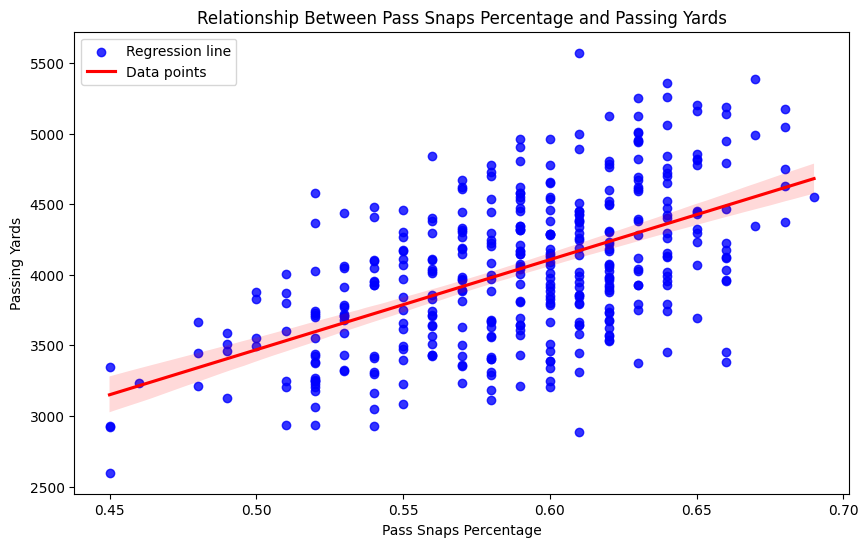

                            OLS Regression Results                            
Dep. Variable:          passing_yards   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     170.5
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.76e-32
Time:                        14:24:11   Log-Likelihood:                -2886.5
No. Observations:                 384   AIC:                             5777.
Df Residuals:                     382   BIC:                             5785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            279.6519    288.239      0.

In [30]:
data = df[["pass_snaps_pct", "passing_yards"]]

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='pass_snaps_pct', y='passing_yards', data=data, color='blue', line_kws={'color': 'red'})
plt.xlabel("Pass Snaps Percentage")
plt.ylabel("Passing Yards")
plt.title("Relationship Between Pass Snaps Percentage and Passing Yards")
plt.legend(["Regression line", "Data points"])
plt.show()

# Simple linear regression analysis
X = data[['pass_snaps_pct']]
y = data['passing_yards']

# Adding constant to the independent variable
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Displaying the summary
print(model.summary())

The regression results provide insights into the relationship between `pass_snaps_pct` (percentage of passing snaps) and `passing_yards`. Here's what we can interpret from the results:

1. **R-squared**: The R-squared value is 0.309, meaning that approximately 30.9% of the variance in `passing_yards` is explained by `pass_snaps_pct`. While this suggests a moderate relationship, other factors likely contribute to variations in passing yards.

2. **Coefficients**:
   - The **intercept** (constant) is estimated at 279.65, which is the baseline passing yards when `pass_snaps_pct` is zero. However, this value isn't highly meaningful by itself, as a `pass_snaps_pct` of zero is unrealistic in this context.
   - The coefficient for `pass_snaps_pct` is 6378.25, meaning that for each 1% increase in the pass snaps percentage, passing yards increase by an average of 63.78 yards. This positive and significant coefficient suggests that higher passing snaps percentage tends to be associated with greater passing yards.

3. **P-value**: The p-value for `pass_snaps_pct` is extremely low (near zero), indicating that the relationship between `pass_snaps_pct` and `passing_yards` is statistically significant.

4. **F-statistic**: The F-statistic (170.5) and its corresponding p-value (<0.0001) confirm that the model as a whole is statistically significant.

5. **Durbin-Watson**: The Durbin-Watson statistic is 1.154, which is a bit low and might indicate some positive autocorrelation in the residuals. This can be a sign that there are patterns in the residuals over time that the model isn't fully capturing.

Overall, this regression analysis suggests that a higher pass snaps percentage is associated with an increase in passing yards, supporting the idea that teams that pass more frequently tend to accumulate more passing yards. However, with an R-squared of 0.309, the model indicates that other factors beyond pass snaps percentage are also significant in determining passing yards.

# Relationship between rush snaps percent and passing yards

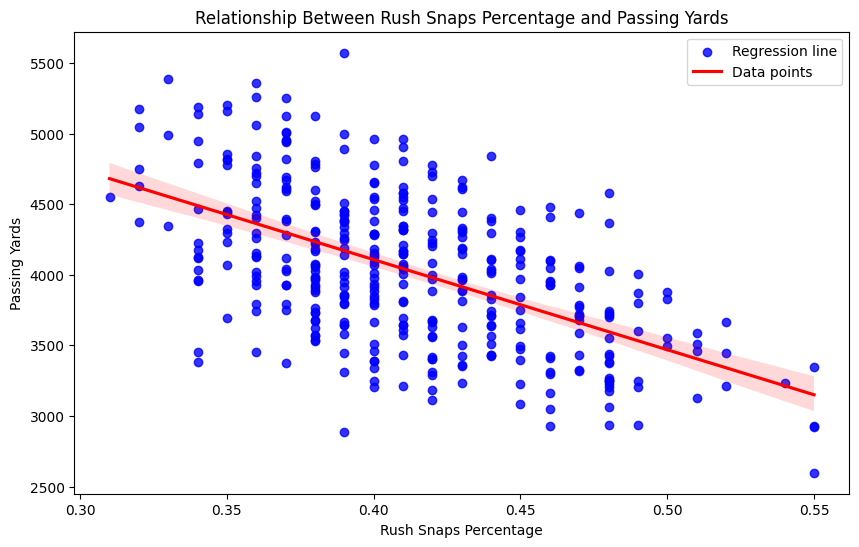

                            OLS Regression Results                            
Dep. Variable:          passing_yards   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     170.5
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.76e-32
Time:                        14:24:12   Log-Likelihood:                -2886.5
No. Observations:                 384   AIC:                             5777.
Df Residuals:                     382   BIC:                             5785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6657.9028    202.362     32.

In [31]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='rush_snaps_pct', y='passing_yards', data=df, color='blue', line_kws={'color': 'red'})
plt.xlabel("Rush Snaps Percentage")
plt.ylabel("Passing Yards")
plt.title("Relationship Between Rush Snaps Percentage and Passing Yards")
plt.legend(["Regression line", "Data points"])
plt.show()

# Simple linear regression analysis
X = df[['rush_snaps_pct']]
y = df['passing_yards']

# Adding constant to the independent variable
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Displaying the summary
print(model.summary())

From the regression results and plot, we can observe the following about the relationship between **rush snaps percentage** and **passing yards**:

1. **Negative Relationship**: The coefficient for `rush_snaps_pct` is -6378.25, indicating a significant negative relationship between rush snaps percentage and passing yards. This suggests that as the proportion of rushing plays increases, passing yards tend to decrease. This could imply that teams that run more often accumulate fewer passing yards, as they may prioritize the running game over passing.

2. **R-squared Value**: The R-squared value is 0.309, meaning approximately 30.9% of the variance in passing yards can be explained by rush snaps percentage. While this is not extremely high, it suggests that rush snaps percentage has a moderate explanatory power regarding passing yards.

3. **Significance of the Relationship**: The p-value associated with the `rush_snaps_pct` coefficient is very low (p < 0.001), which confirms that the relationship is statistically significant. This indicates strong evidence that the negative relationship between rushing frequency and passing yards is not due to random chance.

4. **Intercept**: The intercept (constant) is 6657.90, representing the estimated passing yards when the rush snaps percentage is zero. While this is a hypothetical scenario, it serves as a baseline for the model.

5. **Interpretation of Slope**: The slope of -6378.25 implies that for each 1% increase in rush snaps percentage, passing yards decrease by an average of 63.78 yards. This steep negative slope aligns with the idea that teams with higher rush percentages may rely less on the passing game.

6. **Model Fit and Diagnostics**: 
   - The Durbin-Watson statistic is around 1.15, which suggests mild positive autocorrelation in residuals, though further checks would be needed for a thorough assessment.
   - The residuals show a slight skew but generally seem close to normal, as indicated by the Jarque-Bera test, which does not suggest a significant deviation from normality.

### Summary
The analysis shows a clear inverse relationship between rushing frequency and passing yardage. This is likely due to the fact that teams focusing more on rushing will naturally have fewer opportunities or need to pass, leading to lower passing yard totals. This relationship helps confirm strategic trends in offensive play-calling, where a higher focus on rushing generally limits passing opportunities and passing output. 

### Further Studies
Building on this analysis, you could explore:
- **Team-specific Analysis**: Some teams might deviate from this trend based on their unique offensive strategies. A breakdown by team or offensive scheme could reveal interesting insights.
- **Game Situational Analysis**: Examine how rush snaps percentage changes in specific situations, such as close games vs. large leads, to see if this affects passing yards in a different way.
- **Multivariate Model**: Add other predictors, like total snaps or passing attempts, to see if the explanatory power of the model improves when considering other factors.

# Futher Analysis

## number of wins/points/yards needed to be top of coference

### conference names

## Points difference of each team (Bar plot)
Need to use a different dataset

## Comparison of points and opponent points (Bar Plot)

need more data

## Frequency of penalties per team
need more data

## comparison of scoring percentage and turnover percentage

- How has the performance of NFL teams evolved over the past decade in terms of win percentages and offensive metrics?
- How have wins evolved over time for each conference in the NFL?
- What is the relationship between total yards, points, and wins? Which factor—yards or points—has a greater impact on winning?
- How do average points compare between the best and worst teams in the league?
- Which factor, turnover percentage or penalties, has a more significant impact on wins and point differential? What is the effect of turnover percentage on win percentage and point differential?
- Can a regression model be used to accurately predict wins in the NFL?
- What correlations exist between various NFL statistics?
= How are passing yards and rushing yards related across teams?
- How do total snaps influence offensive outcomes?
Investigate the relationship between total snaps and key metrics like yards gained, touchdowns, and total points.

- What is the impact of passing efficiency on team success?
Explore the relationship between pass completion percentage and win percentage, total points, and yards gained.

- How does the frequency of rushing versus passing impact overall team performance?
Compare teams that rely more heavily on rushing or passing in terms of win percentage, yards per snap (yps), and points per game.

- Do teams that excel in no-huddle and shotgun formations score more points?
Examine if teams with higher no-huddle and shotgun usage have better offensive performance (yards gained, touchdowns, points).

- What is the correlation between air yards and total passing yards?
Determine how air yards contribute to overall passing success and offensive productivity.

- Does a higher number of turnovers (fumbles and interceptions) lead to a significant drop in win percentage?
Analyze the impact of turnovers on win percentage and other success metrics like point differential.

- How does a team's home and away performance differ in terms of wins and points scored?
Compare the performance of teams at home vs. away, looking at wins, losses, and points per game.

- Which factors contribute most to a high points per game average?
Identify the strongest predictors of points per game by exploring variables such as pass attempts, rushing yards, and touchdowns.

- Is there a relationship between receiving yards and points scored?
Explore if teams with higher receiving yards tend to score more points or win more games.

- How does win percentage change over time across teams with different offensive strategies?
Track how offensive strategies (e.g., passing-heavy, rushing-heavy) correlate with win percentage trends over multiple seasons.

## comparative analysis of different regression models to predict the number of wins in an NFL dataset based on a set of independent variables (features)

- points: the points scored by the team.
- points_opp: the points allowed by the team (opponent points).
- total_yards: the total yards gained by the team.
- turnovers: the number of turnovers committed by the team.

# Conclusion
- high yardage does not correlate with wins
- low yardage definetly means more loses